In [1]:
from _config import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.manifold import TSNE

-------------------------------------------------
----- Environment variables from .env file: -----
-------------------------------------------------
-------------------------------------------------


In [2]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

### Start with Spring (1)

In [3]:
#Start with spring and work our way down to winter
season = 1
season_year = 2016
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids]
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2016-03-01 to 2016-05-31
Columns: 272 entries, 10000009 to 25000592
dtypes: float64(272)
memory usage: 196.2 KB


None

            10000009  10000010  10000011  10000014  10000016  10000017  \
2016-03-01  1.113536  0.854309  0.733905  1.076422  0.811773  0.799132   
2016-03-02  1.201155  1.056034  1.013401  1.180009  0.950718  0.935914   
2016-03-03  1.427783  1.196660  1.247251  1.279673  0.948685  0.933913   
2016-03-04  1.288917  1.040852  0.962145  1.204558  0.893647  0.879732   
2016-03-05  1.252717  1.148798  1.063276  1.212513  0.965631  0.950595   
...              ...       ...       ...       ...       ...       ...   
2016-05-27  0.834202  0.665773  0.321999  0.827069  0.485517  0.477957   
2016-05-28  0.814675  0.655424  0.299072  0.793739  0.482215  0.474706   
2016-05-29  0.805291  0.654887  0.289970  0.791308  0.477025  0.469597   
2016-05-30  0.883803  0.849613  0.354779  0.861152  0.553253  0.544638   
2016-05-31  0.890843  0.771022  0.347676  0.834042  0.490507  0.482869   

            11000011  11000016  12000001  13000011  ...  67000017  67000018  \
2016-03-01  1.854690  1.484016  

          2016-03-01  2016-03-02  2016-03-03  2016-03-04  2016-03-05  \
10000009   -0.109768   -0.302046   -0.321281   -0.304649   -0.315477   
10000010   -0.341649   -0.419433   -0.500530   -0.494990   -0.394264   
10000011   -0.449352   -0.453919   -0.461294   -0.555382   -0.459103   
10000014   -0.142967   -0.319151   -0.436150   -0.369378   -0.345958   
10000016   -0.379699   -0.504623   -0.692850   -0.607941   -0.533134   
...              ...         ...         ...         ...         ...   
8000001     0.150722    0.092676    0.614949    0.413294    0.222551   
9000001     0.883215    0.615393    0.465312    0.504875    0.470959   
9000015     0.786750    0.520484    0.367289    0.414285    0.384920   
24000034   -0.685318   -0.901685   -1.079933   -0.956548   -0.939944   
25000592    0.182048   -0.011831   -0.189621   -0.113043   -0.107392   

          2016-03-06  2016-03-07  2016-03-08  2016-03-09  2016-03-10  ...  \
10000009   -0.314670   -0.104452   -0.153116   -0.237007  

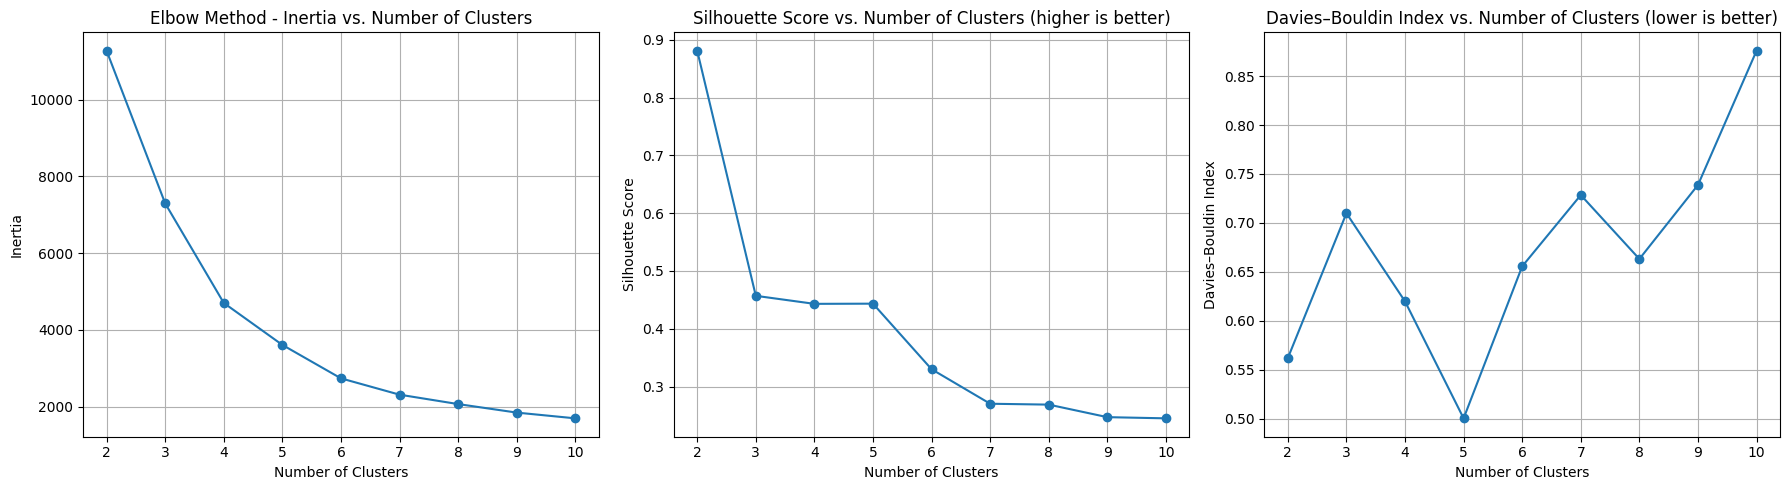

In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
#import numpy as np

# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        0
10000010        0
10000011        0
10000014        0
10000016        0

            10000009  10000010  10000011  10000014  10000016  10000017  \
2016-03-01  1.113536  0.854309  0.733905  1.076422  0.811773  0.799132   
2016-03-02  1.201155  1.056034  1.013401  1.180009  0.950718  0.935914   
2016-03-03  1.427783  1.196660  1.247251  1.279673  0.948685  0.933913   
2016-03-04  1.288917  1.040852  0.962145  1.204558  0.893647  0.879732   
2016-03-05  1.252717  1.148798  1.063276  1.212513  0.965631  0.950595   
...              ...       ...       ...       ...       ...       ...   
2016-05-27  0.834202  0.665773  0.321999  0.827069  0.485517  0.477957   
2016-05-28  0.814675  0.655424  0.299072  0.793739  0.482215  0.474706   
2016-05-29  0.805291  0.654887  0.289970  0.791308  0.477025  0.469597   
2016-05-30  0.883803  0.849613  0.354779  0.861152  0.553253  0.544638   
2016-05-31  0.890843  0.771022  0.347676  0.834042  0.490507  0.482869   

            11000011  11000016  12000001  13000011  ...  67000017  67000018  \
2016-03-01  1.854690  1.484016  

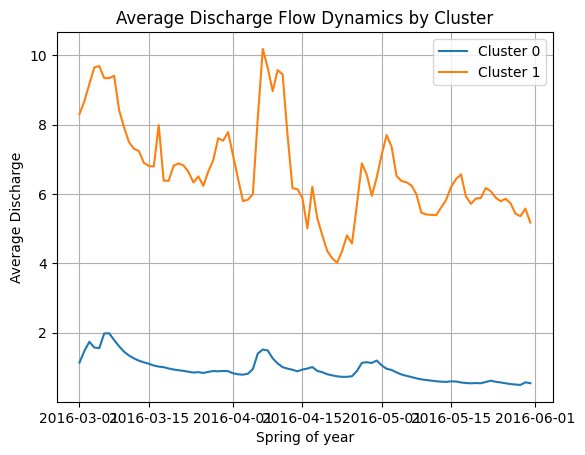

In [5]:
kmeans_final = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure()
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Spring of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)
#print(out_path)

In [7]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000011  10000014  10000016  10000017  \
2016-03-01  1.113536  0.854309  0.733905  1.076422  0.811773  0.799132   
2016-03-02  1.201155  1.056034  1.013401  1.180009  0.950718  0.935914   
2016-03-03  1.427783  1.196660  1.247251  1.279673  0.948685  0.933913   
2016-03-04  1.288917  1.040852  0.962145  1.204558  0.893647  0.879732   
2016-03-05  1.252717  1.148798  1.063276  1.212513  0.965631  0.950595   
...              ...       ...       ...       ...       ...       ...   
2016-05-27  0.834202  0.665773  0.321999  0.827069  0.485517  0.477957   
2016-05-28  0.814675  0.655424  0.299072  0.793739  0.482215  0.474706   
2016-05-29  0.805291  0.654887  0.289970  0.791308  0.477025  0.469597   
2016-05-30  0.883803  0.849613  0.354779  0.861152  0.553253  0.544638   
2016-05-31  0.890843  0.771022  0.347676  0.834042  0.490507  0.482869   

            11000011  11000016  12000001  13000011  ...  67000017  67000018  \
2016-03-01  1.854690  1.484016  0.817077  0.844228  ...  0.774071  0.849264   
2016-03-02  1.839065  1.629237  0.912612  0.962700  ...  0.778053  0.861530   
2016-03-03  1.836283  1.745817  0.890319  0.963340  ...  0.774593  0.864054   
2016-03-04  1.810626  1.636065  0.867115  0.921688  ...  0.814223  0.865734   
2016-03-05  1.793113  1.586819  0.880428  0.924475  ...  0.792891  0.830274   
...              ...       ...       ...       ...  ...       ...       ...   
2016-05-27  0.644625  0.790440  0.521525  0.597501  ...  0.037067  0.067091   
2016-05-28  0.633367  0.783248  0.527050  0.589083  ...  0.036120  0.062725   
2016-05-29  0.624634  0.778766  0.531228  0.581880  ...  0.035506  0.064989   
2016-05-30  0.632498  0.903272  0.647659  0.633971  ...  0.034189  0.063201   
2016-05-31  0.626684  0.885415  0.545202  0.593190  ...  0.032945  0.055638   

            67000019  67000030   7000003   8000001   9000001   9000015  \
2016-03-01  1.063111  1.113901  1.057708  1.404746  2.223623  2.115782   
2016-03-02  1.017002  1.104341  1.376613  1.689132  2.335345  2.218013   
2016-03-03  1.018254  1.061139  2.356184  2.634951  2.442012  2.315621   
2016-03-04  1.024168  0.998784  2.111656  2.224590  2.343944  2.225882   
2016-03-05  0.988188  0.970176  1.794390  1.962368  2.290014  2.176529   
...              ...       ...       ...       ...       ...       ...   
2016-05-27  0.017057  0.145642  0.352731  0.645916  1.075658  1.066005   
2016-05-28  0.012744  0.143249  0.336655  0.617107  1.056522  1.048489   
2016-05-29  0.014199  0.150378  0.326504  0.599836  1.059954  1.051665   
2016-05-30  0.010244  0.142284  0.477740  0.806407  1.142323  1.127223   
2016-05-31  0.007834  0.131920  0.446727  0.719620  1.193303  1.174004   

            24000034  25000592  
2016-03-01  0.470112  1.439766  
2016-03-02  0.459847  1.559935  
2016-03-03  0.449583  1.597545  
2016-03-04  0.439319  1.538632  
2016-03-05  0.429055  1.527178  
...              ...       ...  
2016-05-27  0.026880  1.171570  
2016-05-28  0.026052  1.145893  
2016-05-29  0.025225  1.119457  
2016-05-30  0.024397  1.158480  
2016-05-31  0.023569  1.114585  

[92 rows x 272 columns]

<Axes: >

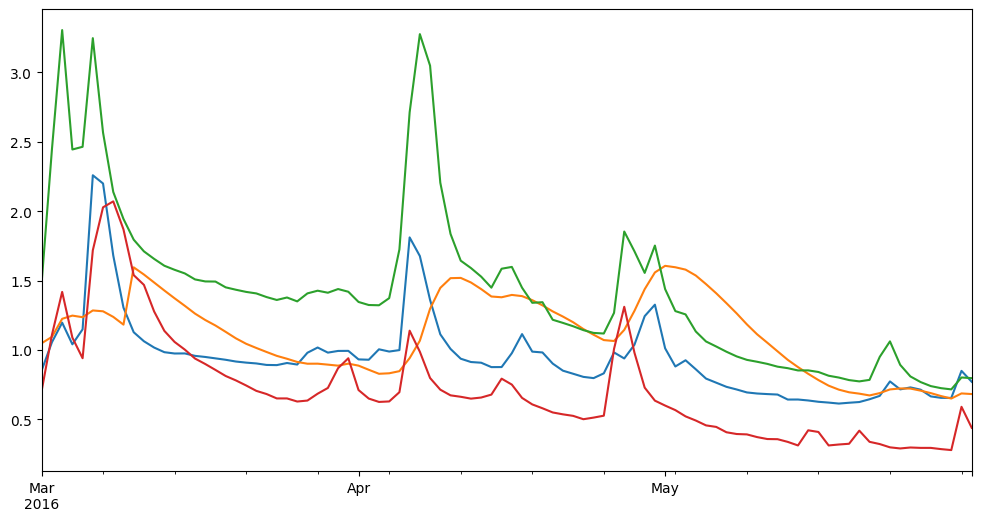

In [8]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

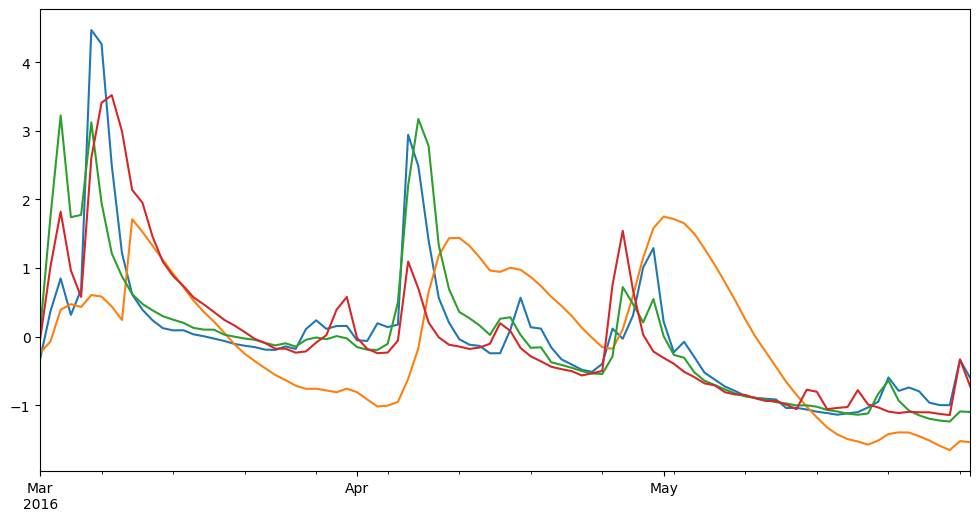

In [9]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

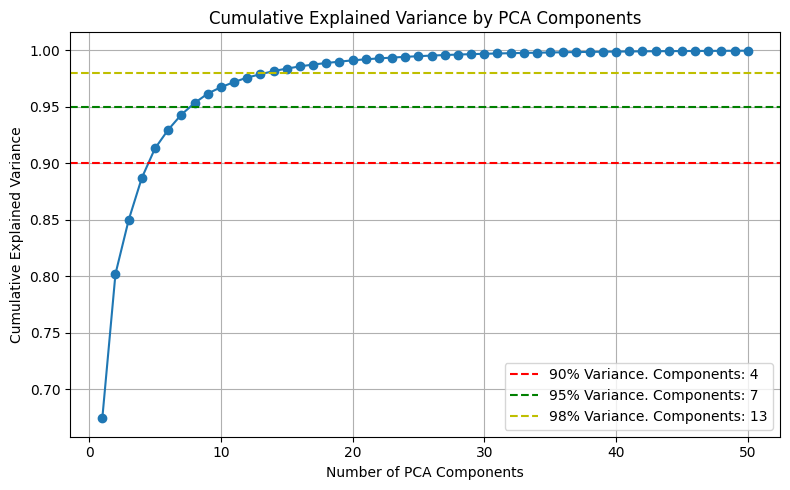

In [10]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [11]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[ 9.30257738e+00, -2.63440853e+00,  6.04084804e+00, ...,
        -6.72603953e-02,  7.63703098e-01, -1.19217891e+00],
       [ 2.16488711e+01,  2.18214782e+00,  4.66663591e+00, ...,
        -7.23800008e-02,  4.60525301e-01,  8.53189972e-01],
       [ 3.14254756e+01, -6.09891631e-01,  9.37261150e-01, ...,
        -1.30596838e+00,  3.80091942e-01,  4.92144290e-01],
       ...,
       [-1.86282102e+01, -2.10510797e+00, -2.26549479e+00, ...,
        -1.56613704e-01, -1.12249680e-01, -1.47203379e-01],
       [-1.52992025e+01, -8.96000868e-03, -3.67450897e+00, ...,
         3.01952918e-01,  1.32841592e+00,  4.49143018e-01],
       [-1.66866620e+01, -6.81240126e-01, -3.44087966e+00, ...,
        -3.73088364e-01,  8.40222344e-01, -2.51942003e-01]],
      shape=(92, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_37576\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


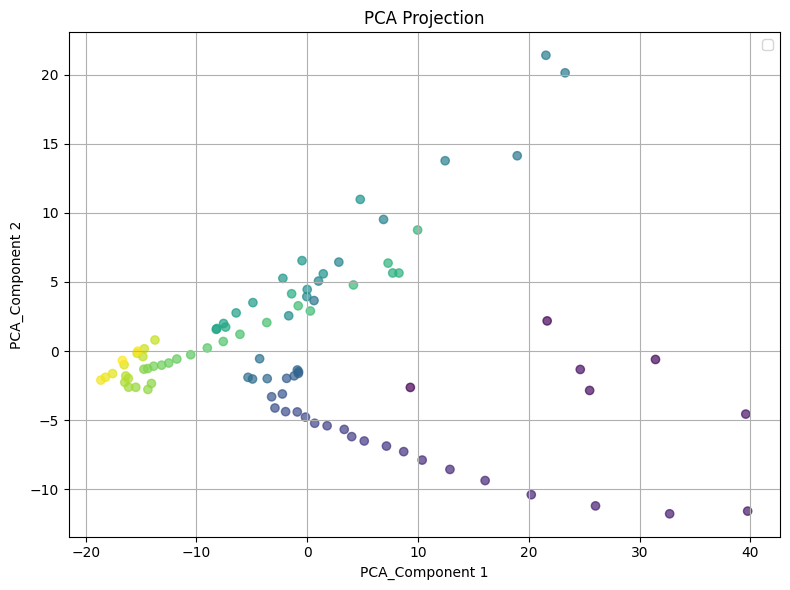

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_37576\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


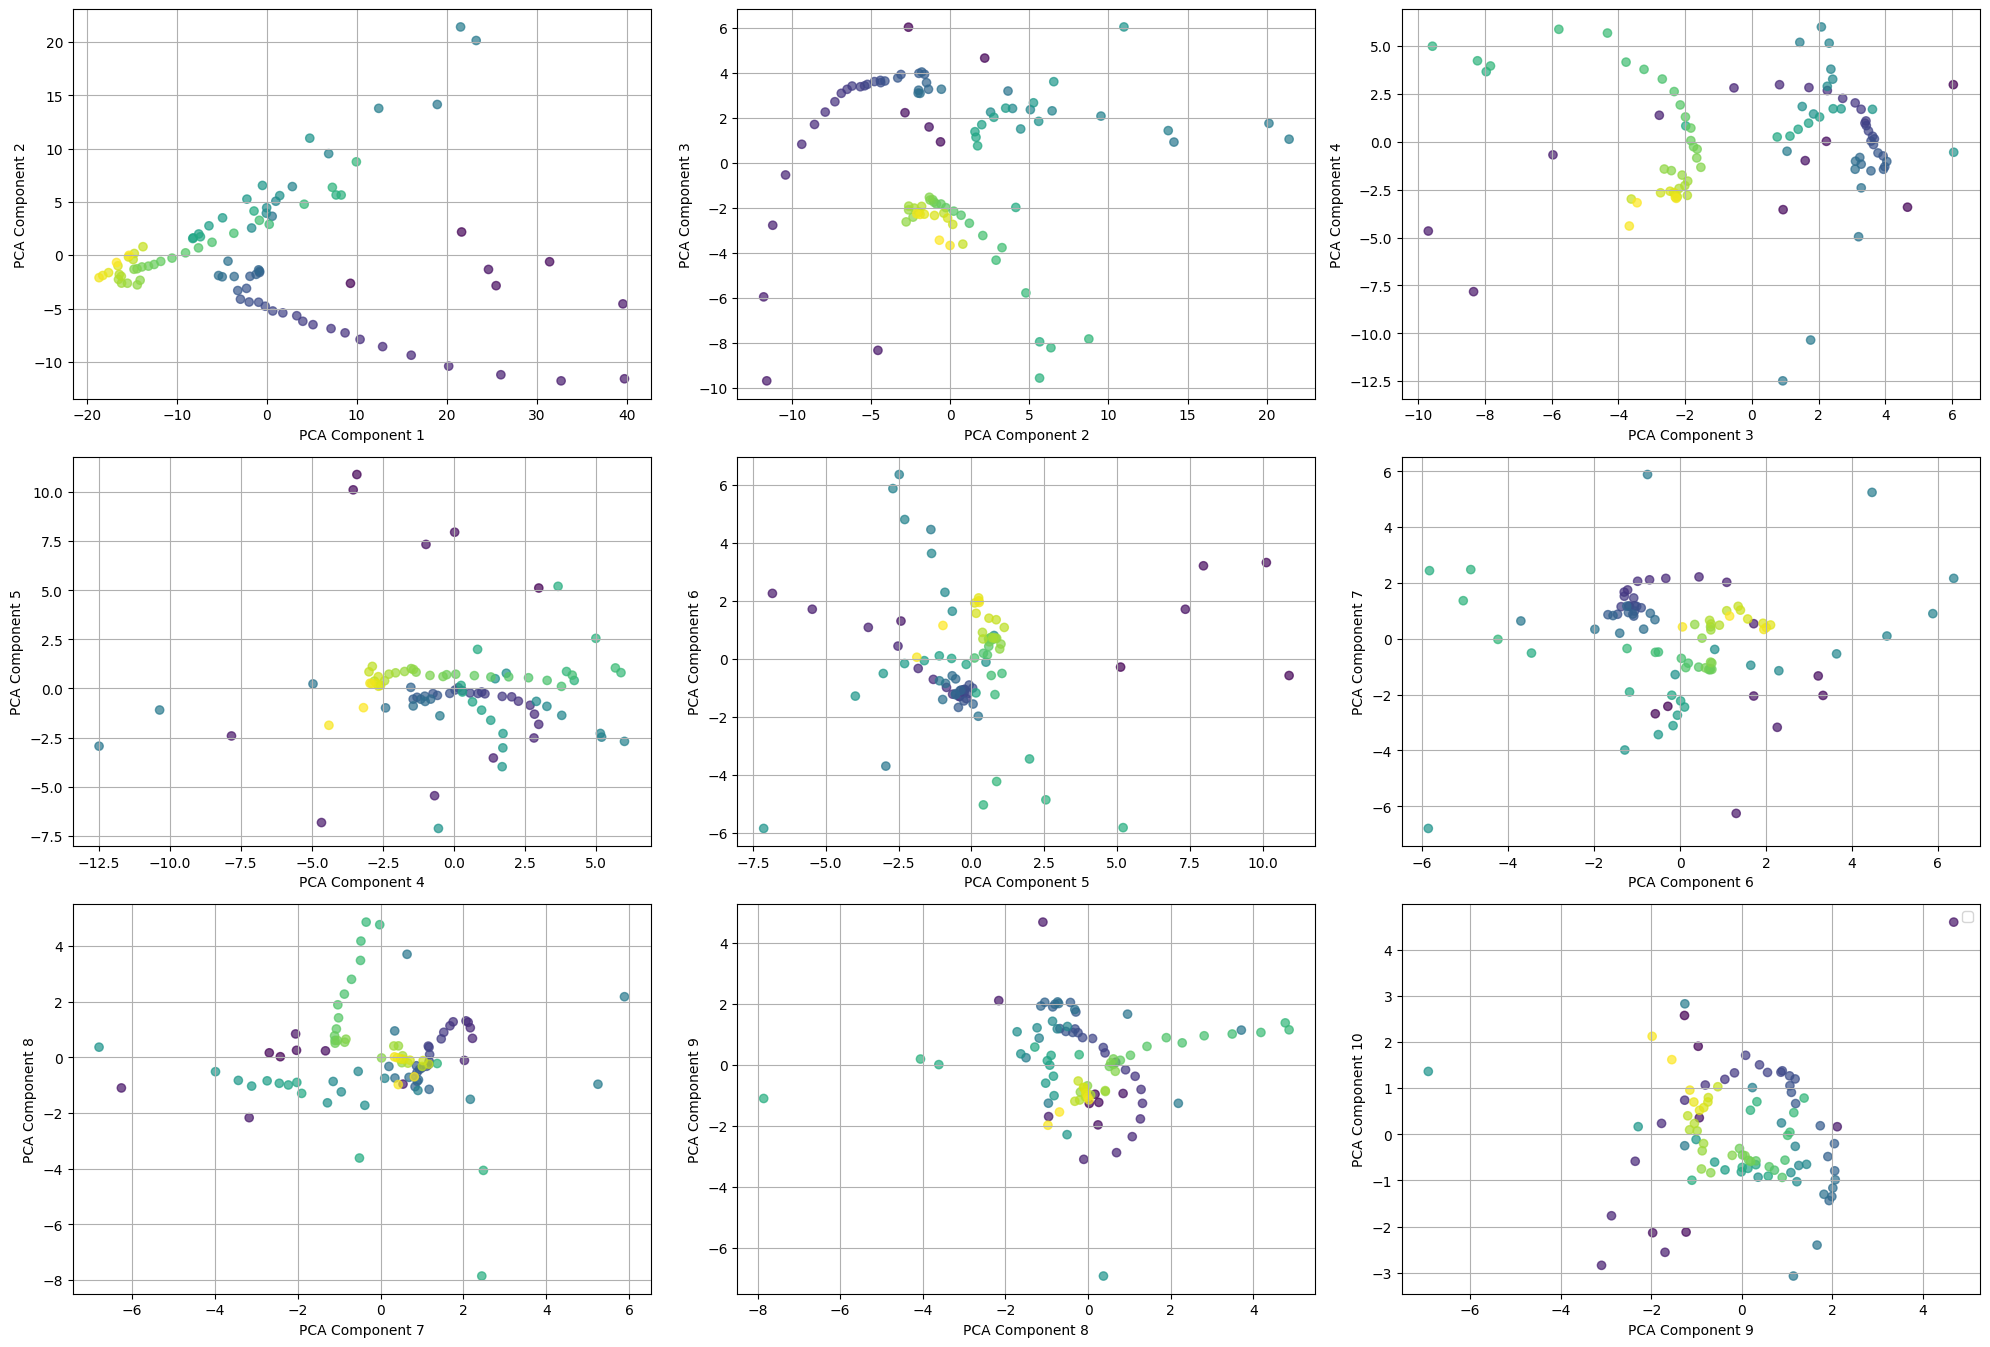

In [13]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [14]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.385
KMeans Davies-Bouldin Index is 0.912


<Axes: xlabel='k'>

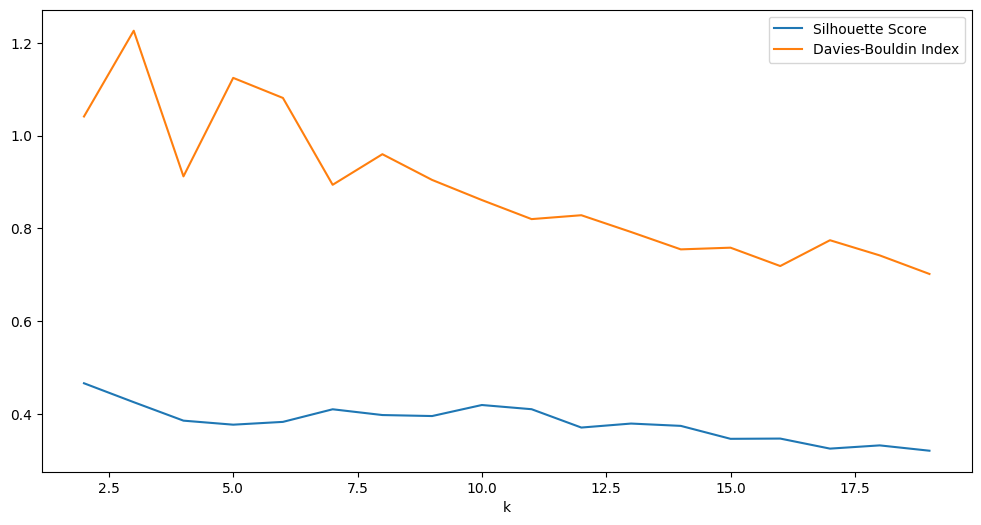

In [15]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     92               NaN   
1    0.76            3         0     92               NaN   
2    1.01            3         3     83         -0.039920   
3    1.27            3         5     70         -0.160716   
4    1.52            3         6     62         -0.102081   
5    1.78            3         7     49          0.040965   
6    2.03            3         6     44          0.045115   
7    2.29            3         6     38          0.075222   
8    2.54            3         5     38          0.097816   
9    2.80            3         5     35          0.109329   
10   3.05            3         5     33          0.100304   
11   3.31            3         4     33          0.145552   
12   3.56            3         4     27          0.195769   
13   3.82            3         4     25          0.206863   
14   4.07            3         4     23          0.227496   
15   4.33            3         4     23          0.227496   
16   4.58            3         4     23          0.227496   
17   4.84            3         4     23          0.227496   
18   5.09            3         4     21          0.203693   
19   5.35            3         3     21          0.227556   
20   5.60            3         3     21          0.227556   
21   5.86            3         3     20          0.261049   
22   6.11            3         2     20          0.263225   
23   6.37            3         2     20          0.263225   
24   6.62            3         1     20               NaN   
25   6.88            3         1     19               NaN   
26   7.13            3         1     19               NaN   
27   7.39            3         1     19               NaN   
28   7.64            3         1     19               NaN   
29   7.90            3         2     14          0.274607   
30   8.15            3         2     14          0.274607   
31   8.41            3         2     14          0.274607   
32   8.66            3         1     13               NaN   
33   8.92            3         1     13               NaN   
34   9.17            3         2      8          0.434008   
35   9.43            3         2      8          0.434008   
36   9.68            3         2      8          0.434008   
37   9.94            3         2      8          0.434008   
38  10.19            3         2      8          0.434008   
39  10.45            3         2      8          0.434008   
40  10.70            3         2      8          0.434008   
41  10.96            3         2      6          0.444026   
42  11.21            3         2      5          0.433847   
43  11.47            3         2      5          0.433847   
44  11.72            3         2      5          0.433847   
45  11.98            3         2      4          0.438835   
46  12.23            3         2      3          0.430179   
47  12.49            3         2      3          0.430179   
48  12.74            3         2      3          0.430179   
49  13.00            3         2      3          0.430179   

    Davies-Bouldin Index  
0                    NaN  
1                    NaN  
2               0.820248  
3               1.276430  
4               1.381024  
5               1.244906  
6               1.201641  
7               1.216928  
8               1.245059  
9               1.320323  
10              1.330459  
11              1.358701  
12              1.150613  
13              1.176432  
14              1.133017  
15              1.133017  
16              1.133017  
17              1.133017  
18              1.174103  
19              1.214295  
20              1.214295  
21              1.217754  
22              1.273052  
23              1.273052  
24                   NaN  
25                   NaN  
26                   NaN  
27                   NaN  
28                   NaN  
29              1.243327  
30              1.243327  
31              1.243327  
32 

<Axes: xlabel='eps'>

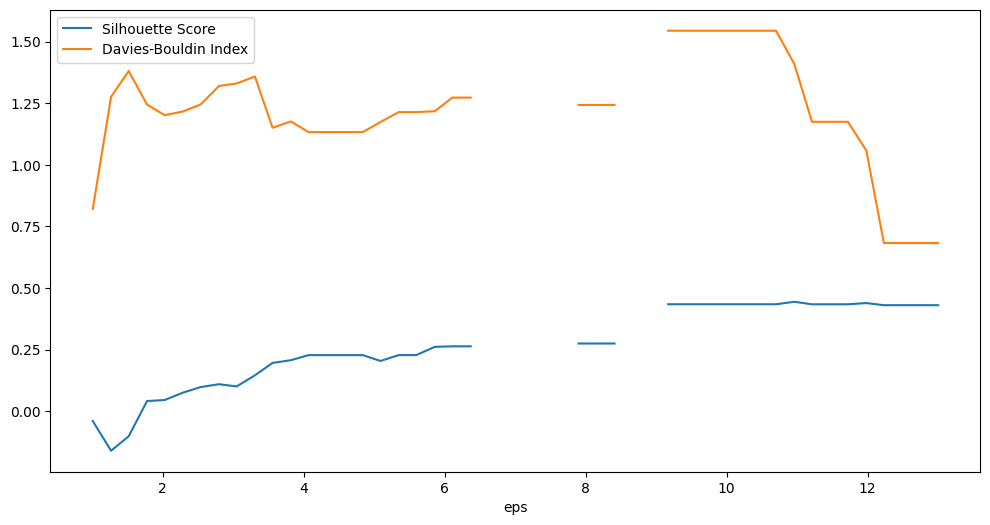

In [16]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

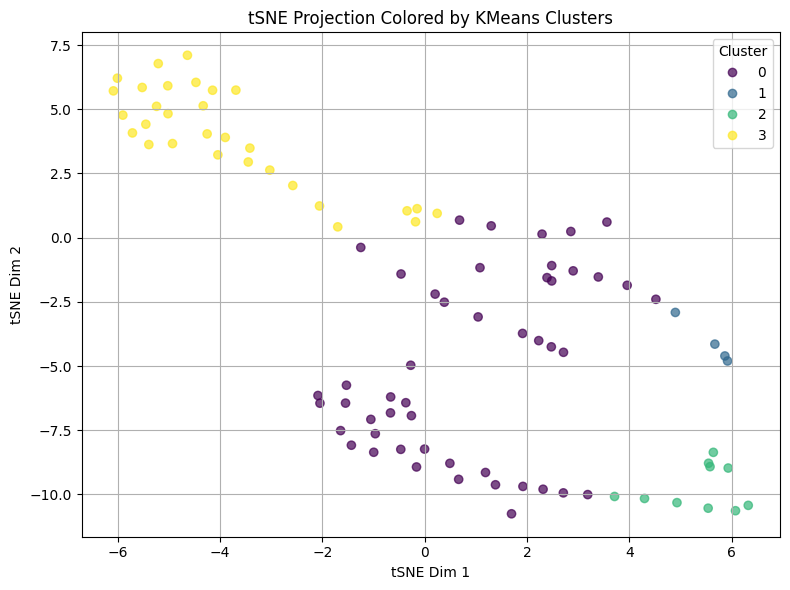

In [17]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.05            2         5    262          0.996939   
1    0.05            2         5    262          0.996939   
2    0.06            2         5    262          0.996939   
3    0.06            2         5    262          0.996939   
4    0.07            2         5    262          0.996939   
..    ...          ...       ...    ...               ...   
195  0.98            2        35     88          0.090929   
196  0.99            2        35     88          0.090929   
197  0.99            2        33     87          0.094673   
198  1.00            2        32     85          0.094028   
199  1.00            2        31     85          0.092397   

     Davies-Bouldin Index  
0                0.004409  
1                0.004409  
2                0.004409  
3                0.004409  
4                0.004409  
..                    ...  
195              0.846614  
196              0.846614  
197              0.833449  
198              0.805241  
199              0.785554  

[200 rows x 6 columns]

<Axes: xlabel='eps'>

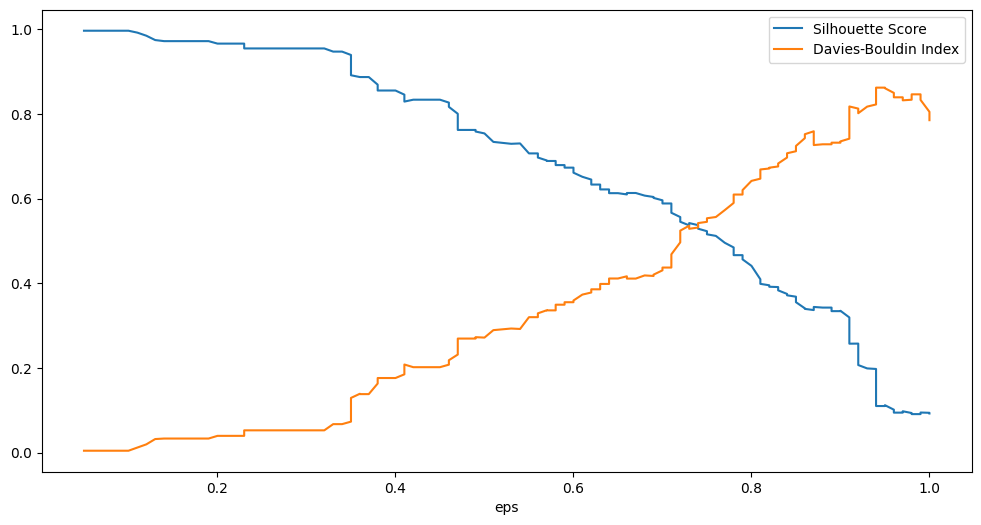

In [18]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 200)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

#### Summer (2)

In [19]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

In [20]:
#Start with spring and work our way down to winter
season = 2
season_year = 2016
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids]
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2016-06-01 to 2016-08-31
Columns: 268 entries, 10000009 to 25000592
dtypes: float64(268)
memory usage: 193.3 KB


None

            10000009  10000010  10000011  10000014  10000016  10000017  \
2016-06-01  0.812260  0.697294  0.335942  0.793983  0.466997  0.459725   
2016-06-02  0.786437  0.689062  0.329676  0.779497  0.455594  0.448499   
2016-06-03  0.772744  0.689779  0.324237  0.769312  0.449297  0.442300   
2016-06-04  0.759069  0.694246  0.319016  0.762694  0.440387  0.433530   
2016-06-05  0.752354  0.694541  0.313727  0.755972  0.437007  0.430202   
...              ...       ...       ...       ...       ...       ...   
2016-08-27  0.740564  0.377147  0.299963  0.682985  0.427934  0.421270   
2016-08-28  0.777002  0.381750  0.405656  0.748974  0.499506  0.491728   
2016-08-29  0.872581  0.453645  0.472884  0.779054  0.502065  0.494247   
2016-08-30  0.816955  0.477368  0.364573  0.735854  0.452009  0.444971   
2016-08-31  0.771020  0.484548  0.330854  0.713084  0.441962  0.435080   

            11000011  11000016  12000001  13000011  ...  66000034  67000017  \
2016-06-01  0.619282  0.828164  

          2016-06-01  2016-06-02  2016-06-03  2016-06-04  2016-06-05  \
10000009    0.295993    0.252520    0.267226    0.285889    0.288603   
10000010    0.145660    0.138783    0.167055    0.204297    0.215937   
10000011   -0.326850   -0.280991   -0.274288   -0.267997   -0.262712   
10000014    0.272094    0.244414    0.263082    0.290452    0.293151   
10000016   -0.155481   -0.133915   -0.123295   -0.115229   -0.107759   
...              ...         ...         ...         ...         ...   
7000003    -0.256058   -0.262091   -0.288909   -0.313451   -0.314981   
8000001     0.140097    0.072062    0.081595    0.045726    0.020491   
9000001     0.740922    0.648995    0.666901    0.684524    0.682533   
9000015     0.720158    0.633063    0.652645    0.672581    0.671648   
25000592    0.639900    0.553842    0.553673    0.568663    0.549226   

          2016-06-06  2016-06-07  2016-06-08  2016-06-09  2016-06-10  ...  \
10000009    0.288368    0.290460    0.284794    0.292271  

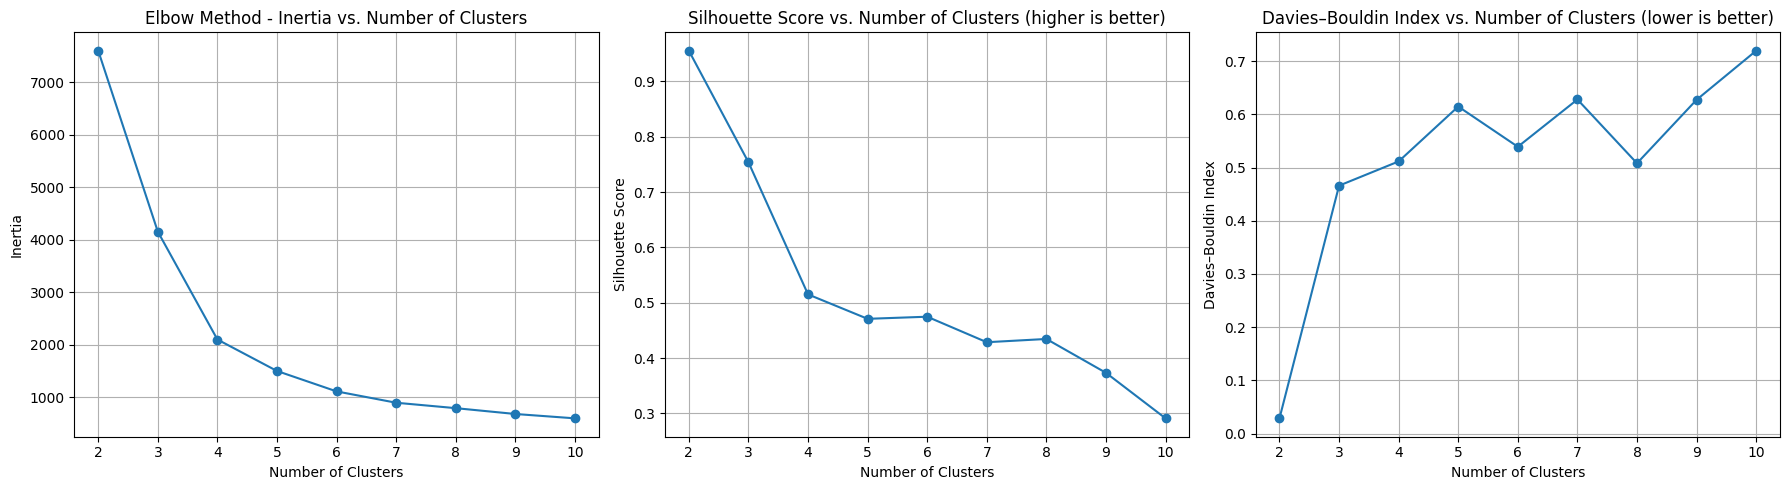

In [21]:
# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        0
10000010        0
10000011        0
10000014        0
10000016        0

            10000009  10000010  10000011  10000014  10000016  10000017  \
2016-06-01  0.812260  0.697294  0.335942  0.793983  0.466997  0.459725   
2016-06-02  0.786437  0.689062  0.329676  0.779497  0.455594  0.448499   
2016-06-03  0.772744  0.689779  0.324237  0.769312  0.449297  0.442300   
2016-06-04  0.759069  0.694246  0.319016  0.762694  0.440387  0.433530   
2016-06-05  0.752354  0.694541  0.313727  0.755972  0.437007  0.430202   
...              ...       ...       ...       ...       ...       ...   
2016-08-27  0.740564  0.377147  0.299963  0.682985  0.427934  0.421270   
2016-08-28  0.777002  0.381750  0.405656  0.748974  0.499506  0.491728   
2016-08-29  0.872581  0.453645  0.472884  0.779054  0.502065  0.494247   
2016-08-30  0.816955  0.477368  0.364573  0.735854  0.452009  0.444971   
2016-08-31  0.771020  0.484548  0.330854  0.713084  0.441962  0.435080   

            11000011  11000016  12000001  13000011  ...  66000034  67000017  \
2016-06-01  0.619282  0.828164  

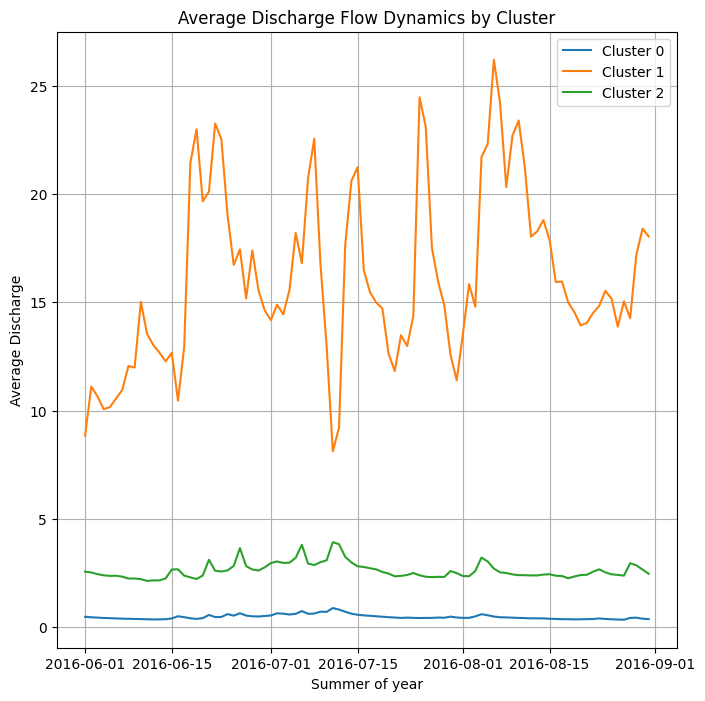

In [22]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure(figsize=(8, 8))
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Summer of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)

In [24]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000011  10000014  10000016  10000017  \
2016-06-01  0.812260  0.697294  0.335942  0.793983  0.466997  0.459725   
2016-06-02  0.786437  0.689062  0.329676  0.779497  0.455594  0.448499   
2016-06-03  0.772744  0.689779  0.324237  0.769312  0.449297  0.442300   
2016-06-04  0.759069  0.694246  0.319016  0.762694  0.440387  0.433530   
2016-06-05  0.752354  0.694541  0.313727  0.755972  0.437007  0.430202   
...              ...       ...       ...       ...       ...       ...   
2016-08-27  0.740564  0.377147  0.299963  0.682985  0.427934  0.421270   
2016-08-28  0.777002  0.381750  0.405656  0.748974  0.499506  0.491728   
2016-08-29  0.872581  0.453645  0.472884  0.779054  0.502065  0.494247   
2016-08-30  0.816955  0.477368  0.364573  0.735854  0.452009  0.444971   
2016-08-31  0.771020  0.484548  0.330854  0.713084  0.441962  0.435080   

            11000011  11000016  12000001  13000011  ...  66000034  67000017  \
2016-06-01  0.619282  0.828164  0.537132  0.579032  ...  0.093163  0.031698   
2016-06-02  0.612093  0.808463  0.532970  0.567788  ...  0.094725  0.033781   
2016-06-03  0.601432  0.787936  0.529621  0.555793  ...  0.098061  0.030492   
2016-06-04  0.591534  0.778036  0.527585  0.548208  ...  0.092757  0.028561   
2016-06-05  0.581213  0.767135  0.525666  0.537802  ...  0.082507  0.027057   
...              ...       ...       ...       ...  ...       ...       ...   
2016-08-27  0.456287  0.585769  0.468930  0.324290  ...  0.043088  0.012646   
2016-08-28  0.469234  0.638714  0.508487  0.412311  ...  0.041261  0.013200   
2016-08-29  0.481949  0.705978  0.482169  0.414502  ...  0.049006  0.014591   
2016-08-30  0.482226  0.653291  0.468003  0.366795  ...  0.040212  0.013406   
2016-08-31  0.484223  0.632268  0.466576  0.420099  ...  0.045426  0.012125   

            67000018  67000019  67000030   7000003   8000001   9000001  \
2016-06-01  0.052820  0.006305  0.127285  0.390081  0.693039  1.152518   
2016-06-02  0.049343  0.004954  0.123532  0.345857  0.631939  1.125876   
2016-06-03  0.044880  0.004278  0.111689  0.312127  0.618996  1.103775   
2016-06-04  0.040247  0.004080  0.108924  0.282903  0.568264  1.075778   
2016-06-05  0.036205  0.003815  0.104577  0.272141  0.539044  1.065765   
...              ...       ...       ...       ...       ...       ...   
2016-08-27  0.003648  0.009958  0.073867  0.383788  0.479876  0.700481   
2016-08-28  0.003058  0.009813  0.073486  0.426102  0.504489  0.719372   
2016-08-29  0.003890  0.014424  0.079846  0.477582  0.601718  0.742583   
2016-08-30  0.003153  0.009205  0.078556  0.355465  0.638538  0.708988   
2016-08-31  0.002119  0.007664  0.080581  0.330731  0.627534  0.717873   

             9000015  25000592  
2016-06-01  1.136639  1.075262  
2016-06-02  1.112236  1.044411  
2016-06-03  1.091967  1.009994  
2016-06-04  1.066289  0.983728  
2016-06-05  1.057105  0.959706  
...              ...       ...  
2016-08-27  0.723096  1.163888  
2016-08-28  0.740495  1.228768  
2016-08-29  0.761862  1.262638  
2016-08-30  0.731050  1.185647  
2016-08-31  0.739255  1.163749  

[92 rows x 268 columns]

<Axes: >

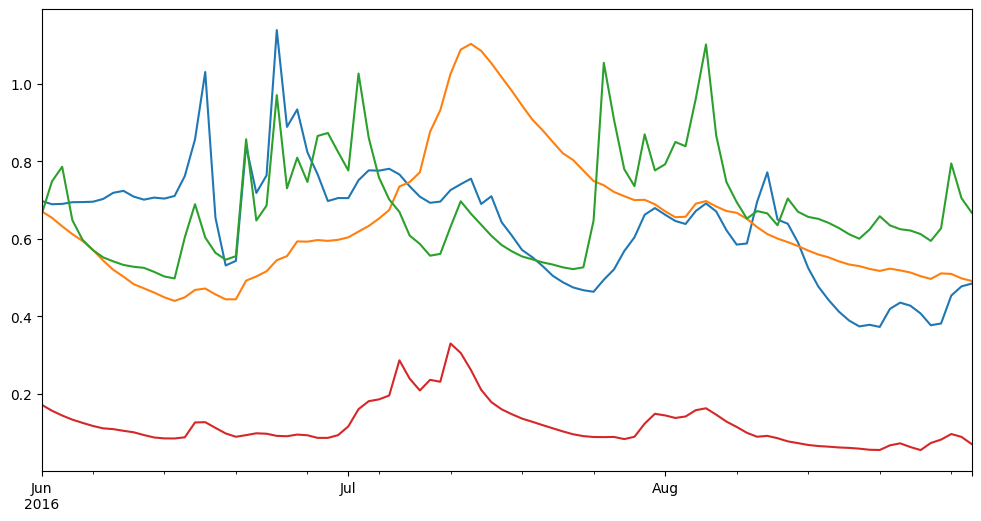

In [25]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

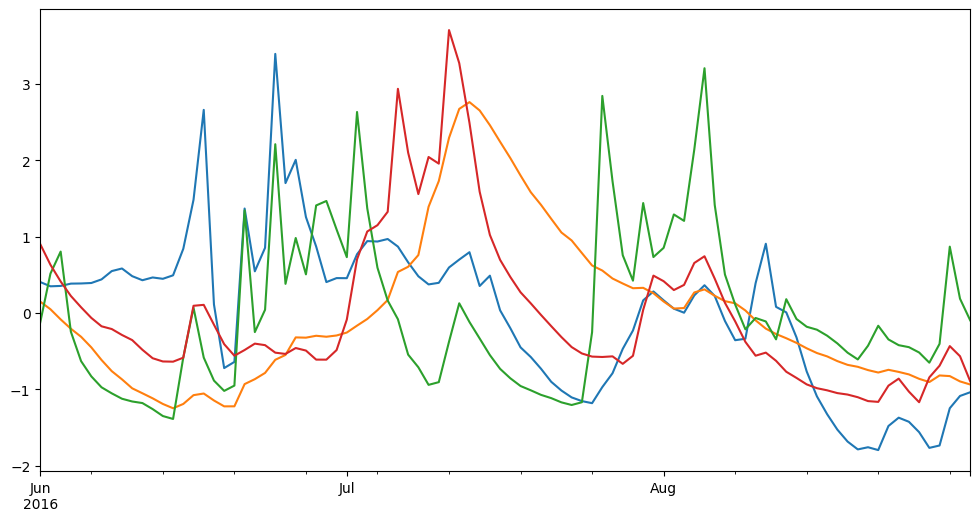

In [26]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

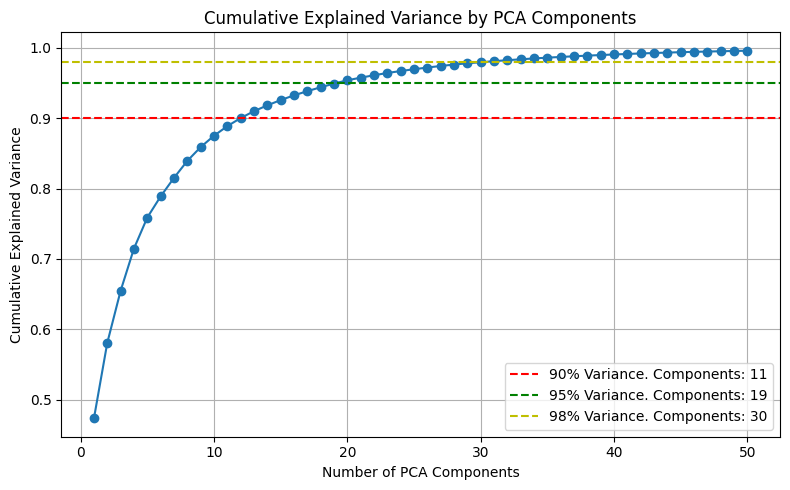

In [27]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [28]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[ 1.49900345e+00,  8.44350694e+00, -4.19073143e+00, ...,
         1.14220647e+00, -3.08881276e-01, -3.90261611e-01],
       [-7.30169507e-01,  8.13788593e+00, -4.11063870e+00, ...,
         1.51280191e+00, -3.22392273e-02, -3.67090457e-01],
       [-2.43595100e+00,  8.13460284e+00, -3.65608282e+00, ...,
         1.29288376e+00, -8.26422853e-02, -1.52737114e-02],
       ...,
       [-5.01377420e+00, -3.87128190e+00,  4.26977089e+00, ...,
        -1.14573897e-01,  1.02913805e+00, -1.32467854e+00],
       [-9.42376197e+00, -4.33259433e+00,  1.60619783e+00, ...,
         2.00759156e-01,  2.75483952e-01, -2.03981386e+00],
       [-1.13541299e+01, -4.32058618e+00,  3.72463907e-01, ...,
         3.24299670e-01,  9.11483627e-03, -1.96620020e+00]],
      shape=(92, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_37576\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


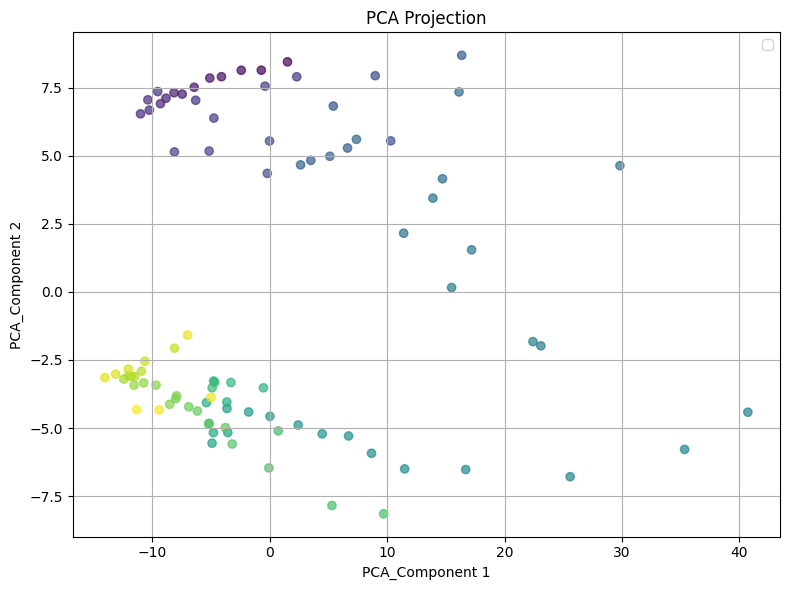

In [29]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_37576\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


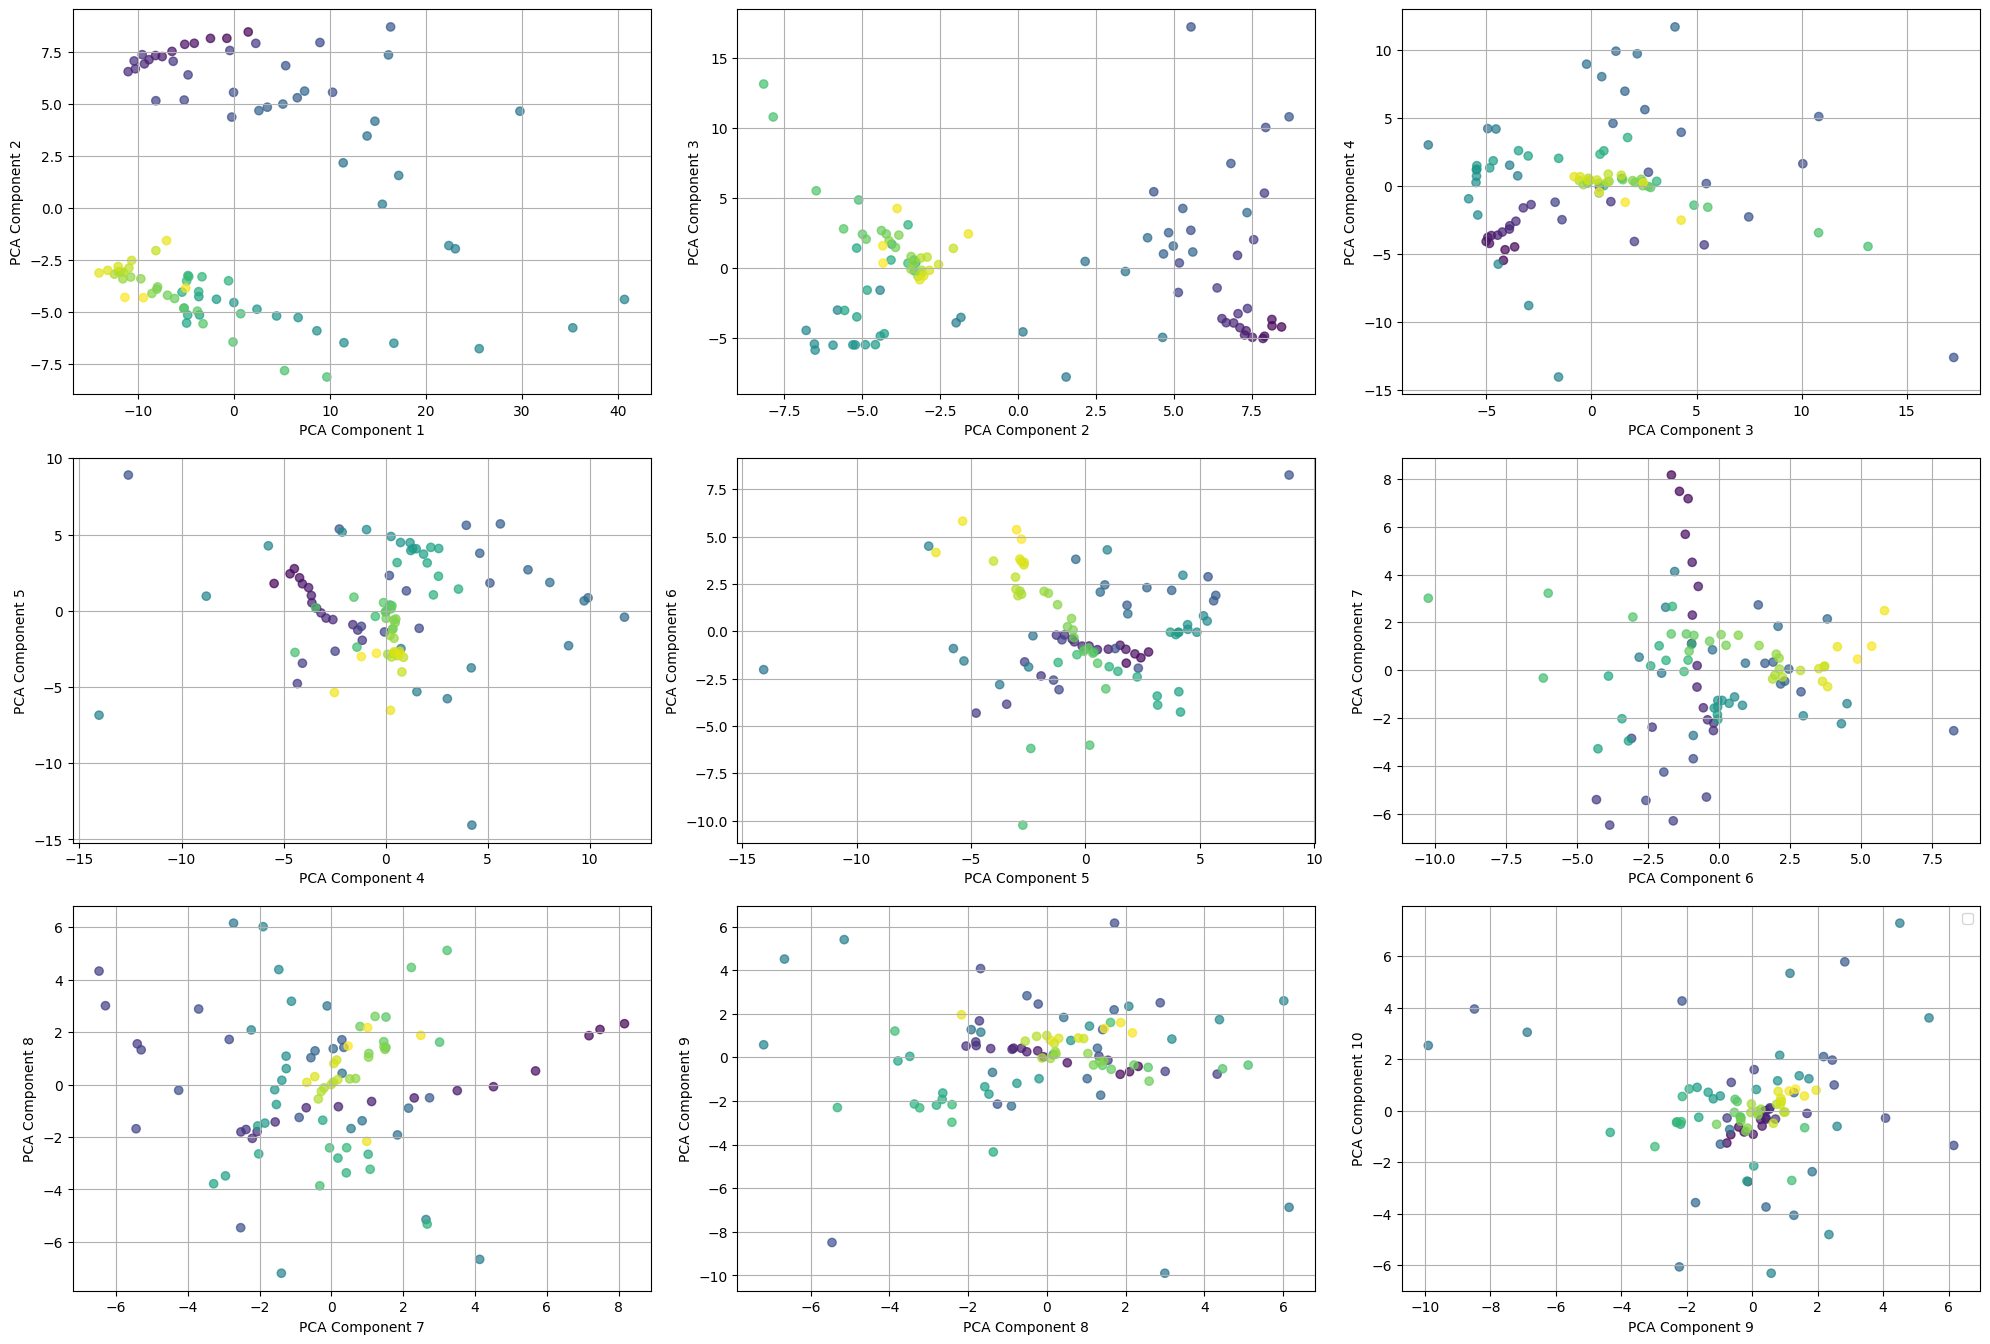

In [30]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [31]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.263
KMeans Davies-Bouldin Index is 1.219


<Axes: xlabel='k'>

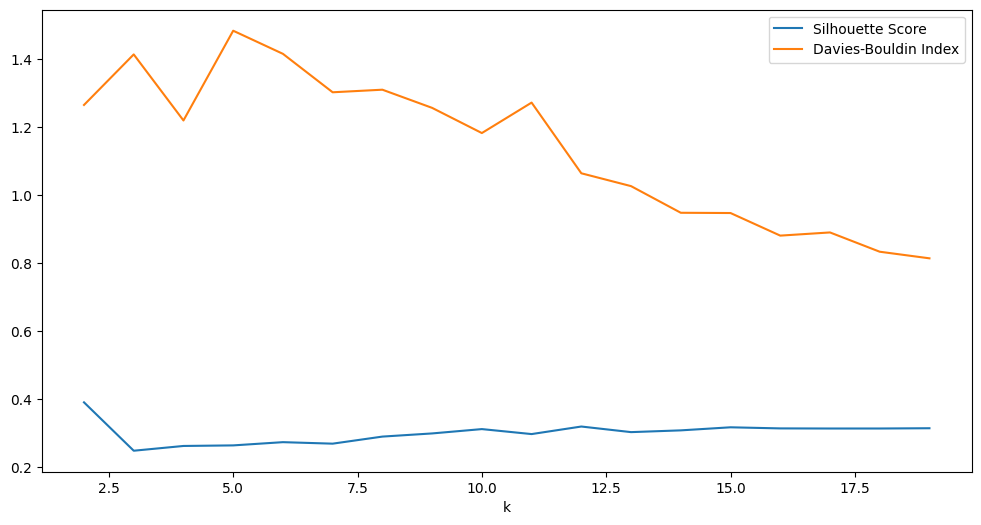

In [32]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     92               NaN   
1    0.76            3         0     92               NaN   
2    1.01            3         0     92               NaN   
3    1.27            3         0     92               NaN   
4    1.52            3         1     89               NaN   
5    1.78            3         4     72         -0.085780   
6    2.03            3         4     68         -0.046529   
7    2.29            3         5     61         -0.012572   
8    2.54            3         5     58          0.005926   
9    2.80            3         4     54          0.043834   
10   3.05            3         4     51          0.052888   
11   3.31            3         4     48          0.069588   
12   3.56            3         4     48          0.069588   
13   3.82            3         4     46          0.089890   
14   4.07            3         4     46          0.089890   
15   4.33            3         4     46          0.089890   
16   4.58            3         4     45          0.092868   
17   4.84            3         4     43          0.116339   
18   5.09            3         4     41          0.135046   
19   5.35            3         4     40          0.132150   
20   5.60            3         5     37          0.120576   
21   5.86            3         5     36          0.140224   
22   6.11            3         5     33          0.157205   
23   6.37            3         5     31          0.169627   
24   6.62            3         5     29          0.180309   
25   6.88            3         5     29          0.180309   
26   7.13            3         5     28          0.192865   
27   7.39            3         5     26          0.203270   
28   7.64            3         4     25          0.233771   
29   7.90            3         4     25          0.233771   
30   8.15            3         3     23          0.186397   
31   8.41            3         3     23          0.186397   
32   8.66            3         3     23          0.186397   
33   8.92            3         3     23          0.186397   
34   9.17            3         3     23          0.186397   
35   9.43            3         3     21          0.195323   
36   9.68            3         3     19          0.188396   
37   9.94            3         4     14          0.189832   
38  10.19            3         4     14          0.189832   
39  10.45            3         3     14          0.218480   
40  10.70            3         3     14          0.218480   
41  10.96            3         3     13          0.222519   
42  11.21            3         2     13          0.215501   
43  11.47            3         2     12          0.202924   
44  11.72            3         3      8          0.186376   
45  11.98            3         2      7          0.343165   
46  12.23            3         2      7          0.343165   
47  12.49            3         2      7          0.343165   
48  12.74            3         2      7          0.343165   
49  13.00            3         2      6          0.331559   

    Davies-Bouldin Index  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN  
5               1.164156  
6               1.155723  
7               1.256459  
8               1.338400  
9               1.563798  
10              1.591999  
11              1.613758  
12              1.613758  
13              1.592394  
14              1.592394  
15              1.592394  
16              1.627103  
17              1.616233  
18              1.551887  
19              1.552926  
20              1.667071  
21              1.671347  
22              1.777048  
23              1.739289  
24              1.676258  
25              1.676258  
26              1.639573  
27              1.573600  
28              1.592193  
29              1.592193  
30              1.527561  
31              1.527561  
32 

<Axes: xlabel='eps'>

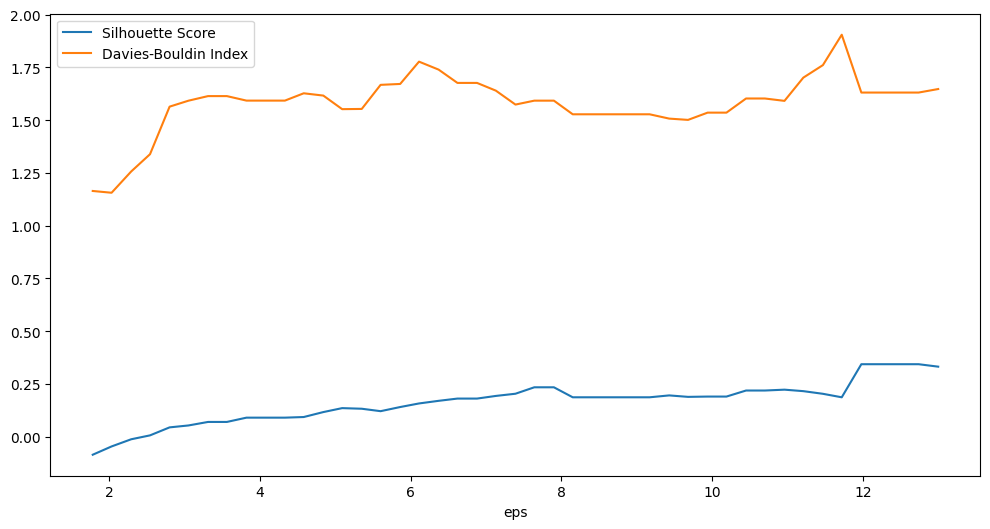

In [33]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

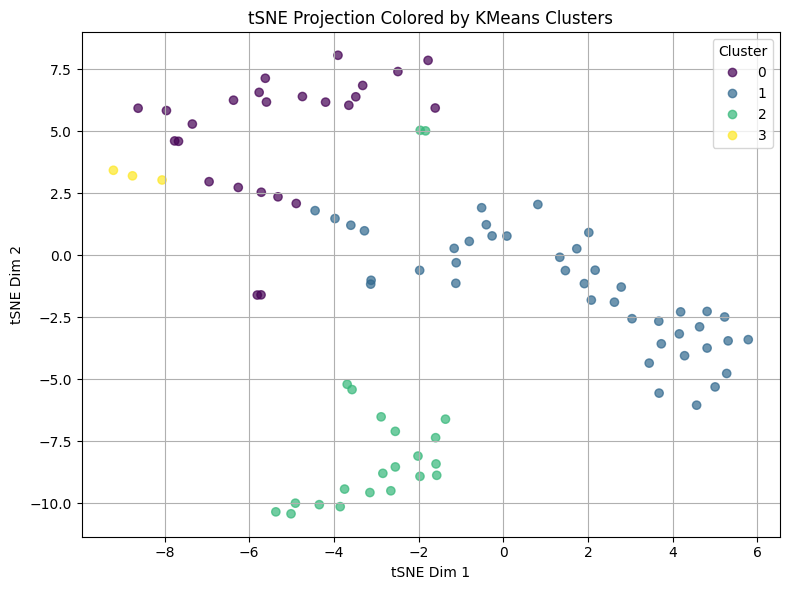

In [34]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.05            2         9    249          0.968766   
1    0.05            2         9    249          0.968766   
2    0.06            2        10    247          0.947458   
3    0.06            2        10    247          0.947458   
4    0.07            2        12    242          0.855635   
..    ...          ...       ...    ...               ...   
195  0.98            2         3     21          0.500334   
196  0.99            2         3     21          0.500334   
197  0.99            2         3     21          0.500334   
198  1.00            2         3     21          0.500334   
199  1.00            2         3     21          0.500334   

     Davies-Bouldin Index  
0                0.033868  
1                0.033868  
2                0.055704  
3                0.055704  
4                0.143760  
..                    ...  
195              0.326513  
196              0.326513  
197              0.326513  
198              0.326513  
199              0.326513  

[200 rows x 6 columns]

<Axes: xlabel='eps'>

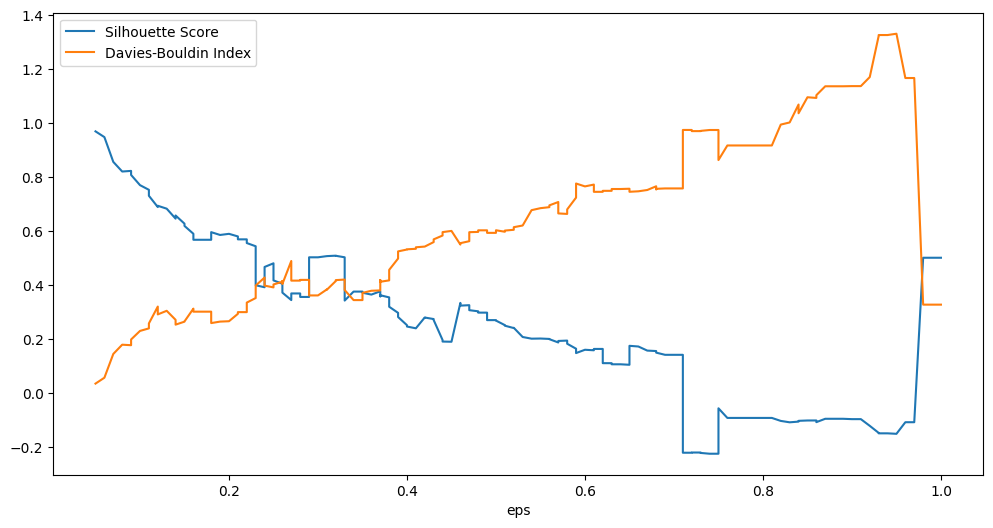

In [35]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 200)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

#### Fall (3)

In [36]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

In [37]:
#Start with spring and work our way down to winter
season = 3
season_year = 2016
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids]
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 91 entries, 2016-09-01 to 2016-11-30
Columns: 267 entries, 10000009 to 25000592
dtypes: float64(267)
memory usage: 190.5 KB


None

            10000009  10000010  10000011  10000014  10000016  10000017  \
2016-09-01  0.755864  0.481447  0.333019  0.703390  0.436730  0.429929   
2016-09-02  0.745177  0.482760  0.318083  0.711372  0.435078  0.428303   
2016-09-03  0.750337  0.493621  0.325509  0.719779  0.441803  0.434923   
2016-09-04  0.760979  0.496591  0.306482  0.713664  0.435836  0.429049   
2016-09-05  0.737068  0.507983  0.291632  0.709170  0.427486  0.420830   
...              ...       ...       ...       ...       ...       ...   
2016-11-26  1.120865  0.637766  0.623969  0.986055  0.528433  0.520205   
2016-11-27  1.080183  0.613633  0.577557  0.971670  0.512837  0.504851   
2016-11-28  1.027810  0.595451  0.535661  0.933697  0.498005  0.490250   
2016-11-29  1.005961  0.588485  0.520981  0.921192  0.498991  0.491221   
2016-11-30  1.056636  0.612114  0.521649  0.951112  0.508641  0.500720   

            11000011  11000016  12000001  13000011  ...  66000034  67000017  \
2016-09-01  0.482475  0.648782  

          2016-09-01  2016-09-02  2016-09-03  2016-09-04  2016-09-05  \
10000009    0.214445    0.211218    0.201599    0.054952    0.020846   
10000010   -0.018769   -0.015057   -0.014865   -0.127837   -0.163894   
10000011   -0.144912   -0.157054   -0.156618   -0.259273   -0.338366   
10000014    0.169850    0.182068    0.175832    0.022240   -0.001652   
10000016   -0.056773   -0.056173   -0.058558   -0.169841   -0.228810   
...              ...         ...         ...         ...         ...   
7000003    -0.166228   -0.172878   -0.180780   -0.273569   -0.351633   
8000001     0.095727    0.047283    0.006512   -0.127131   -0.190349   
9000001     0.171742    0.214247    0.218734    0.057754   -0.015425   
9000015     0.190798    0.230587    0.233230    0.069977    0.003659   
25000592    0.548201    0.559204    0.538952    0.345559    0.373814   

          2016-09-06  2016-09-07  2016-09-08  2016-09-09  2016-09-10  ...  \
10000009    0.091604    0.125164    0.148629    0.160919  

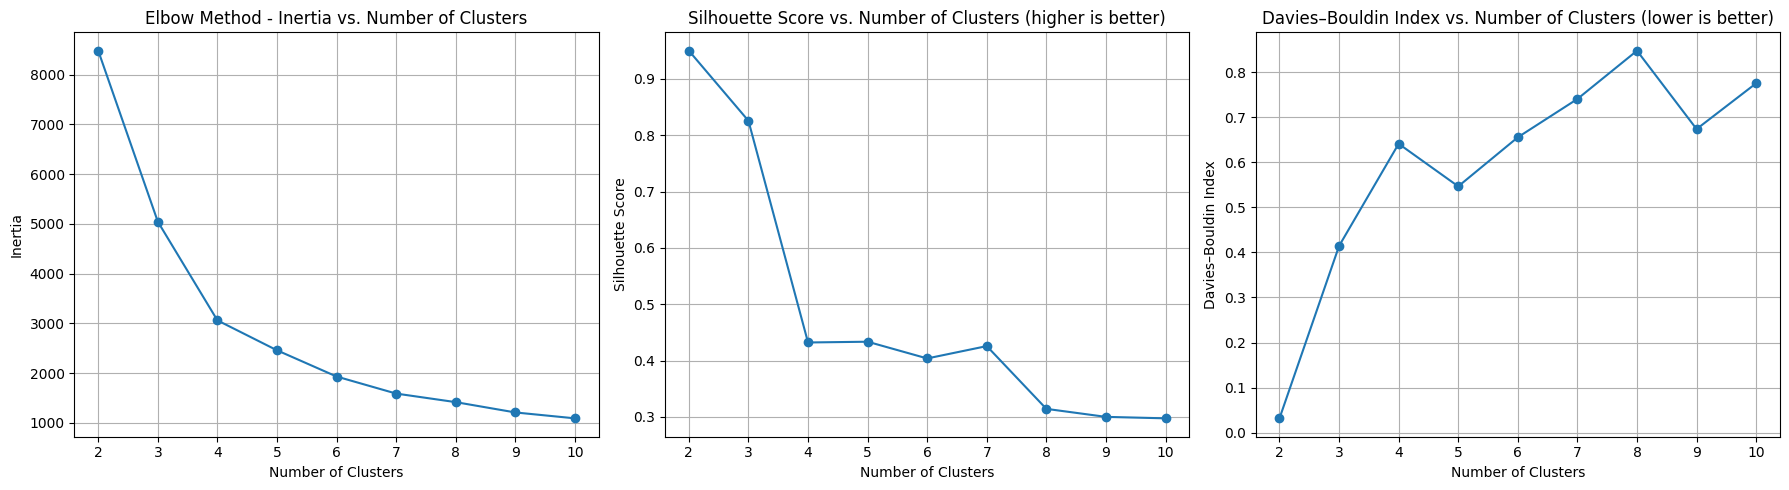

In [38]:
# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        2
10000010        2
10000011        2
10000014        2
10000016        2

            10000009  10000010  10000011  10000014  10000016  10000017  \
2016-09-01  0.755864  0.481447  0.333019  0.703390  0.436730  0.429929   
2016-09-02  0.745177  0.482760  0.318083  0.711372  0.435078  0.428303   
2016-09-03  0.750337  0.493621  0.325509  0.719779  0.441803  0.434923   
2016-09-04  0.760979  0.496591  0.306482  0.713664  0.435836  0.429049   
2016-09-05  0.737068  0.507983  0.291632  0.709170  0.427486  0.420830   
...              ...       ...       ...       ...       ...       ...   
2016-11-26  1.120865  0.637766  0.623969  0.986055  0.528433  0.520205   
2016-11-27  1.080183  0.613633  0.577557  0.971670  0.512837  0.504851   
2016-11-28  1.027810  0.595451  0.535661  0.933697  0.498005  0.490250   
2016-11-29  1.005961  0.588485  0.520981  0.921192  0.498991  0.491221   
2016-11-30  1.056636  0.612114  0.521649  0.951112  0.508641  0.500720   

            11000011  11000016  12000001  13000011  ...  66000034  67000017  \
2016-09-01  0.482475  0.648782  

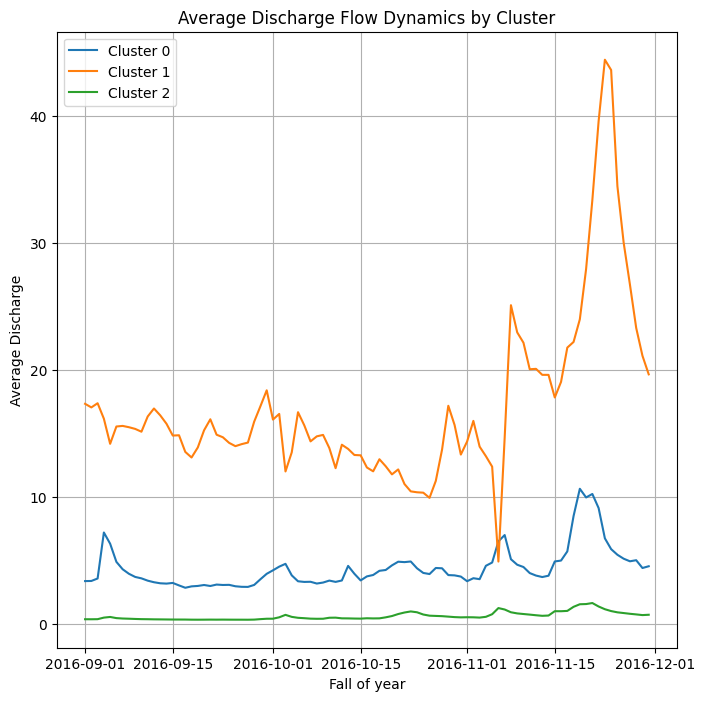

In [39]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure(figsize=(8, 8))
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Fall of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)

In [41]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000011  10000014  10000016  10000017  \
2016-09-01  0.755864  0.481447  0.333019  0.703390  0.436730  0.429929   
2016-09-02  0.745177  0.482760  0.318083  0.711372  0.435078  0.428303   
2016-09-03  0.750337  0.493621  0.325509  0.719779  0.441803  0.434923   
2016-09-04  0.760979  0.496591  0.306482  0.713664  0.435836  0.429049   
2016-09-05  0.737068  0.507983  0.291632  0.709170  0.427486  0.420830   
...              ...       ...       ...       ...       ...       ...   
2016-11-26  1.120865  0.637766  0.623969  0.986055  0.528433  0.520205   
2016-11-27  1.080183  0.613633  0.577557  0.971670  0.512837  0.504851   
2016-11-28  1.027810  0.595451  0.535661  0.933697  0.498005  0.490250   
2016-11-29  1.005961  0.588485  0.520981  0.921192  0.498991  0.491221   
2016-11-30  1.056636  0.612114  0.521649  0.951112  0.508641  0.500720   

            11000011  11000016  12000001  13000011  ...  66000034  67000017  \
2016-09-01  0.482475  0.648782  0.465652  0.421380  ...  0.049441  0.012567   
2016-09-02  0.480916  0.622241  0.476545  0.432155  ...  0.049080  0.012292   
2016-09-03  0.481285  0.629758  0.502573  0.437080  ...  0.058750  0.013168   
2016-09-04  0.481474  0.626207  0.474273  0.430830  ...  0.098072  0.026628   
2016-09-05  0.473735  0.620493  0.465136  0.423553  ...  0.221200  0.100647   
...              ...       ...       ...       ...  ...       ...       ...   
2016-11-26  1.236874  1.049633  0.628374  0.733099  ...  0.432446  0.591270   
2016-11-27  1.217641  0.975385  0.602516  0.688670  ...  0.413019  0.549746   
2016-11-28  1.178940  0.905445  0.583885  0.656850  ...  0.366496  0.450461   
2016-11-29  1.139822  0.888534  0.574293  0.645486  ...  0.344787  0.426366   
2016-11-30  1.124059  0.924607  0.591237  0.708866  ...  0.366590  0.416420   

            67000018  67000019  67000030   7000003   8000001   9000001  \
2016-09-01  0.002948  0.007773  0.080103  0.307937  0.616172  0.705617   
2016-09-02  0.002017  0.008120  0.078775  0.299731  0.555058  0.748690   
2016-09-03  0.002985  0.011343  0.089836  0.296854  0.518973  0.770659   
2016-09-04  0.007336  0.027944  0.110836  0.285804  0.497613  0.765031   
2016-09-05  0.378671  0.462541  0.208159  0.275181  0.475178  0.692090   
...              ...       ...       ...       ...       ...       ...   
2016-11-26  0.675139  1.002115  0.714954  1.413296  1.569287  0.884994   
2016-11-27  0.617279  0.935474  0.659066  1.226167  1.421228  0.861008   
2016-11-28  0.487671  0.834184  0.594082  1.051303  1.284669  0.844433   
2016-11-29  0.436565  0.777096  0.580753  0.969131  1.185171  0.847348   
2016-11-30  0.476384  0.791997  0.592699  0.957579  1.168781  0.858089   

             9000015  25000592  
2016-09-01  0.728040  1.148586  
2016-09-02  0.767640  1.148746  
2016-09-03  0.787850  1.150423  
2016-09-04  0.782712  1.181315  
2016-09-05  0.715756  1.174761  
...              ...       ...  
2016-11-26  0.892399  1.319597  
2016-11-27  0.870215  1.297973  
2016-11-28  0.854862  1.275163  
2016-11-29  0.857467  1.287920  
2016-11-30  0.867280  1.332134  

[91 rows x 267 columns]

<Axes: >

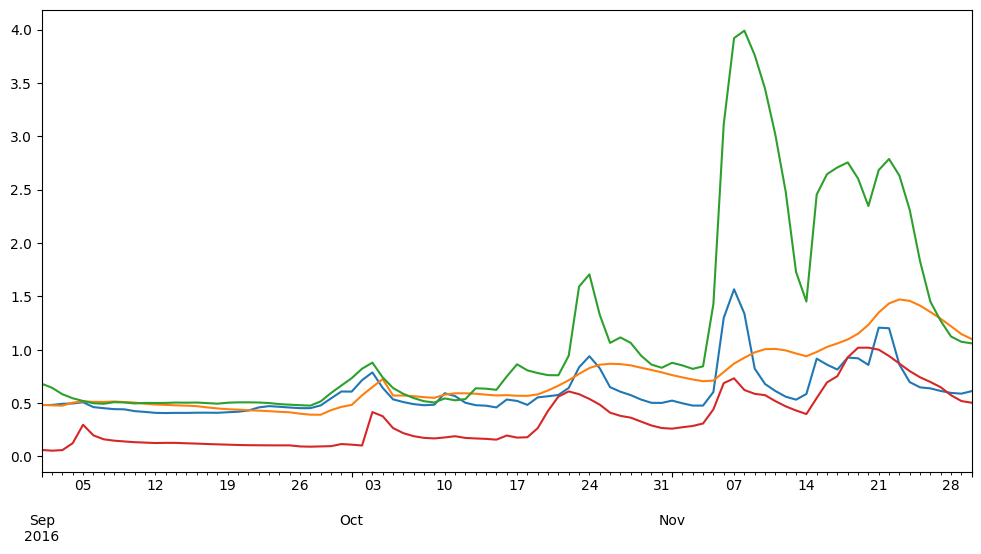

In [42]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

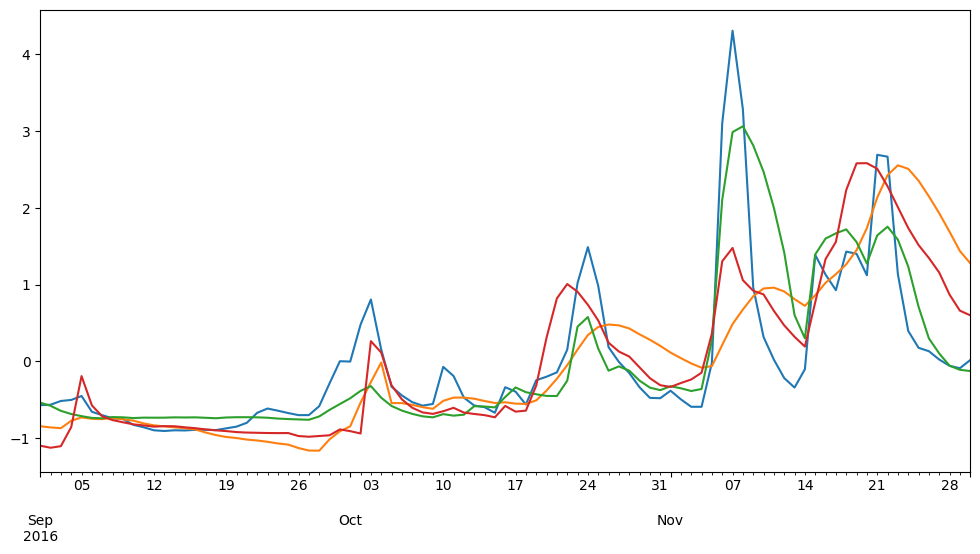

In [43]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

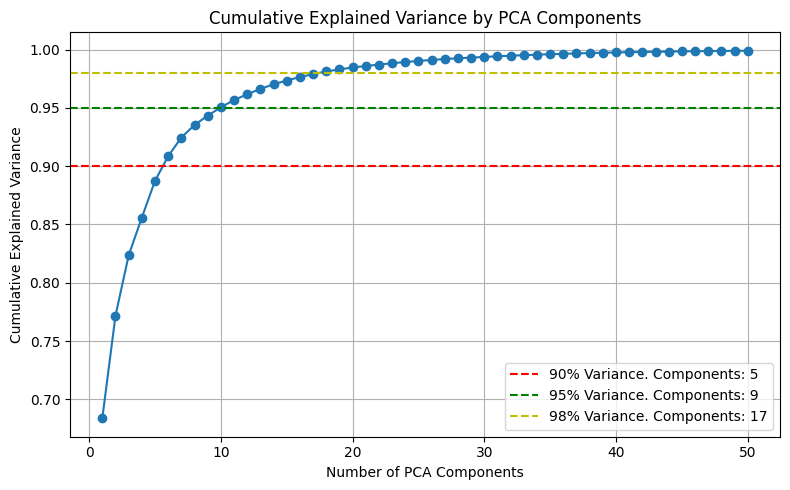

In [44]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [45]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[-11.3007444 ,   2.88865314,   1.44155424, ...,   1.34732618,
          0.33576406,  -0.72657274],
       [-11.40041817,   2.97361943,   1.65518759, ...,   1.3077212 ,
          0.3118128 ,  -0.7371201 ],
       [-11.0150876 ,   2.98089513,   2.03785964, ...,   1.23064831,
          0.18851448,  -0.61557863],
       ...,
       [  7.7221583 ,   6.15022353,  -6.34484573, ...,  -0.59373953,
          0.09063671,  -0.37100609],
       [  5.87162102,   5.7760085 ,  -6.26296928, ...,   0.09900748,
         -0.05828048,   0.49351833],
       [  7.07662599,   5.42105298,  -5.11355866, ...,   0.11570175,
         -0.25976631,   1.13277966]], shape=(91, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_37576\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


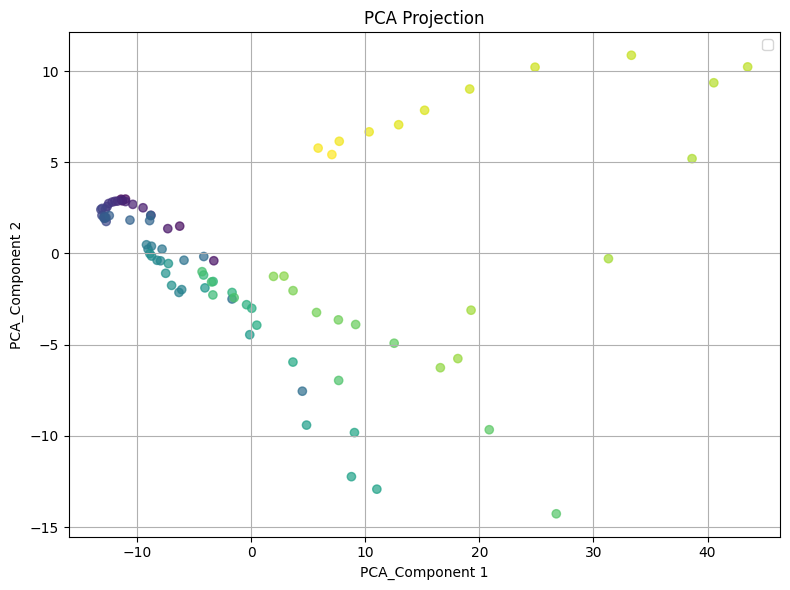

In [46]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_37576\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


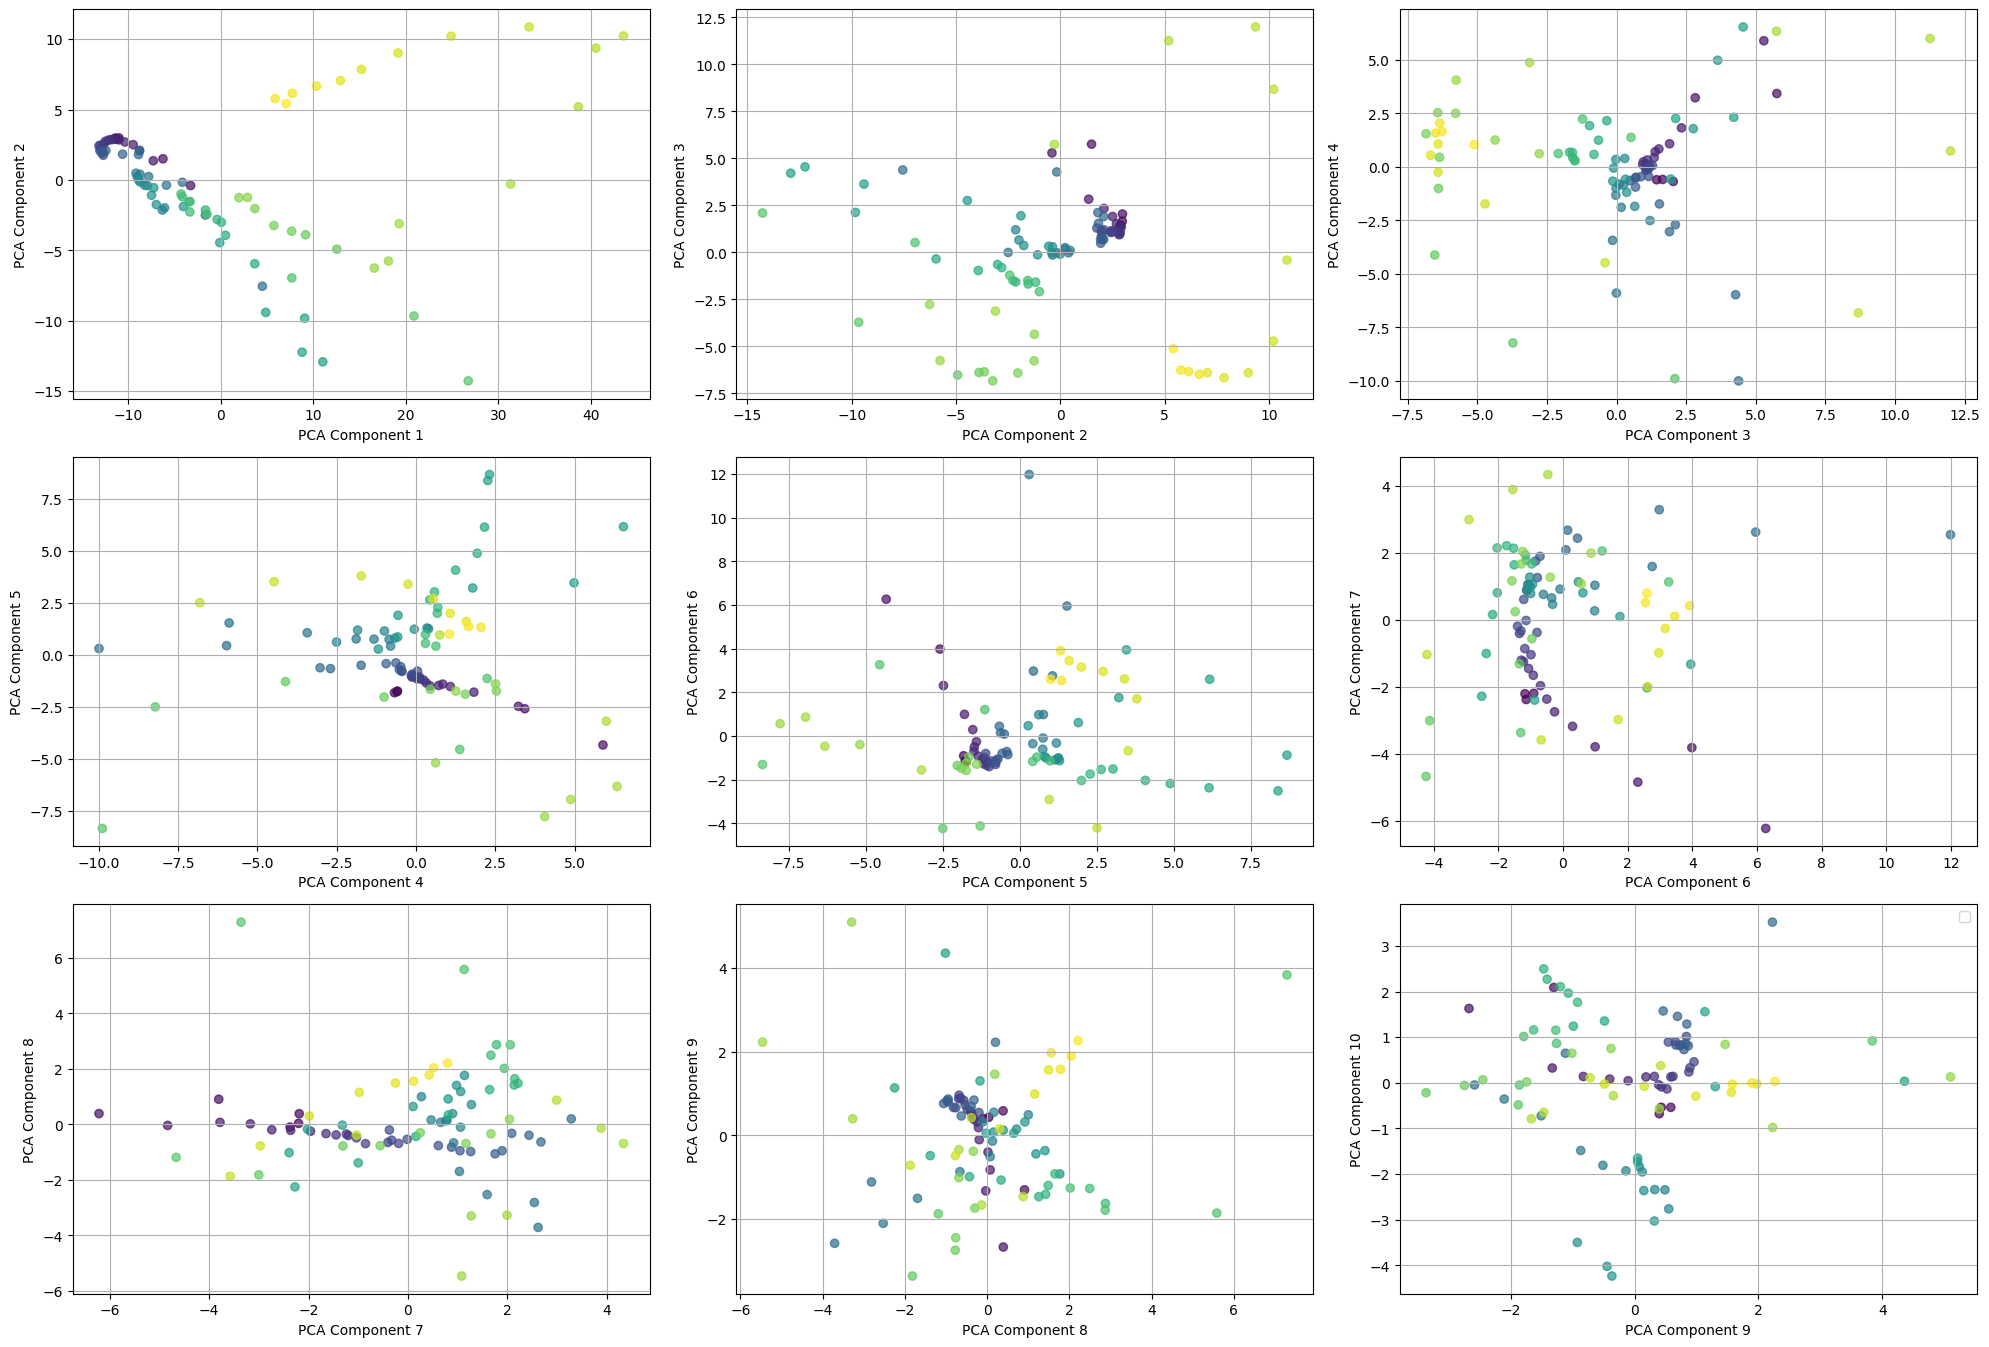

In [47]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [48]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.328
KMeans Davies-Bouldin Index is 1.189


<Axes: xlabel='k'>

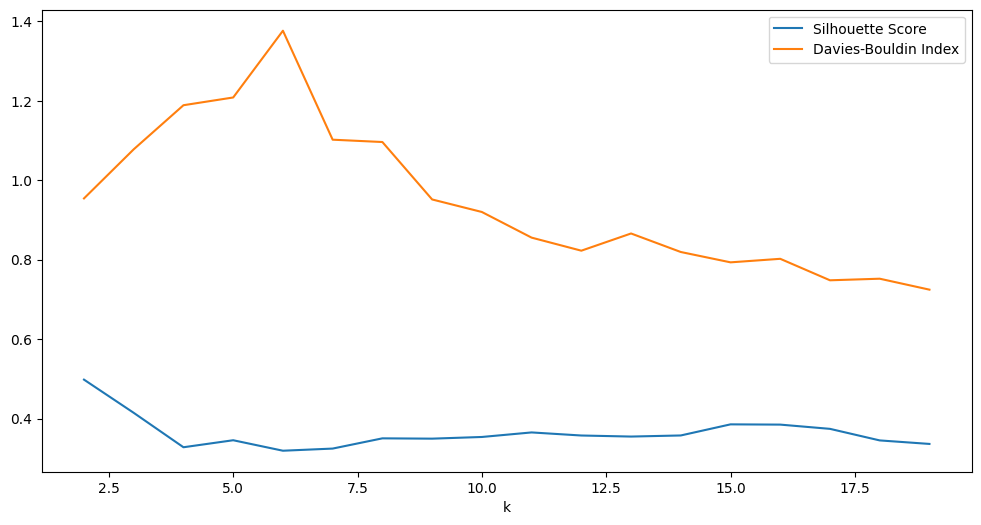

In [49]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     91               NaN   
1    0.76            3         2     79         -0.106677   
2    1.01            3         5     67         -0.080784   
3    1.27            3         3     65         -0.066246   
4    1.52            3         3     65         -0.066246   
5    1.78            3         4     61         -0.037674   
6    2.03            3         5     58         -0.077647   
7    2.29            3         4     53          0.030156   
8    2.54            3         4     52          0.032115   
9    2.80            3         4     45          0.109164   
10   3.05            3         5     40          0.087610   
11   3.31            3         5     28          0.223630   
12   3.56            3         5     28          0.223630   
13   3.82            3         5     27          0.233813   
14   4.07            3         5     27          0.233813   
15   4.33            3         5     27          0.233813   
16   4.58            3         5     26          0.234819   
17   4.84            3         5     26          0.234819   
18   5.09            3         5     25          0.238169   
19   5.35            3         5     24          0.246676   
20   5.60            3         5     23          0.257807   
21   5.86            3         4     23          0.282549   
22   6.11            3         4     23          0.282549   
23   6.37            3         4     22          0.278356   
24   6.62            3         3     22          0.309300   
25   6.88            3         3     21          0.309330   
26   7.13            3         3     20          0.312279   
27   7.39            3         3     19          0.337088   
28   7.64            3         3     19          0.337088   
29   7.90            3         3     19          0.337088   
30   8.15            3         3     19          0.337088   
31   8.41            3         3     18          0.328274   
32   8.66            3         3     14          0.378053   
33   8.92            3         3     10          0.396014   
34   9.17            3         3      9          0.409190   
35   9.43            3         3      9          0.409190   
36   9.68            3         3      9          0.409190   
37   9.94            3         3      9          0.409190   
38  10.19            3         3      9          0.409190   
39  10.45            3         2      9          0.381471   
40  10.70            3         2      8          0.365912   
41  10.96            3         2      8          0.365912   
42  11.21            3         2      8          0.365912   
43  11.47            3         2      8          0.365912   
44  11.72            3         2      7          0.359092   
45  11.98            3         2      6          0.362670   
46  12.23            3         2      6          0.362670   
47  12.49            3         2      6          0.362670   
48  12.74            3         2      6          0.362670   
49  13.00            3         3      2          0.373642   

    Davies-Bouldin Index  
0                    NaN  
1               1.010069  
2               0.994191  
3               1.033073  
4               1.033073  
5               1.010471  
6               1.170122  
7               1.278454  
8               1.322660  
9               1.104026  
10              1.418579  
11              1.456393  
12              1.456393  
13              1.422634  
14              1.422634  
15              1.422634  
16              1.425013  
17              1.425013  
18              1.439866  
19              1.411089  
20              1.381534  
21              1.445401  
22              1.445401  
23              1.421448  
24              1.495734  
25              1.544414  
26              1.500309  
27              1.535364  
28              1.535364  
29              1.535364  
30              1.535364  
31              1.543534  
32 

<Axes: xlabel='eps'>

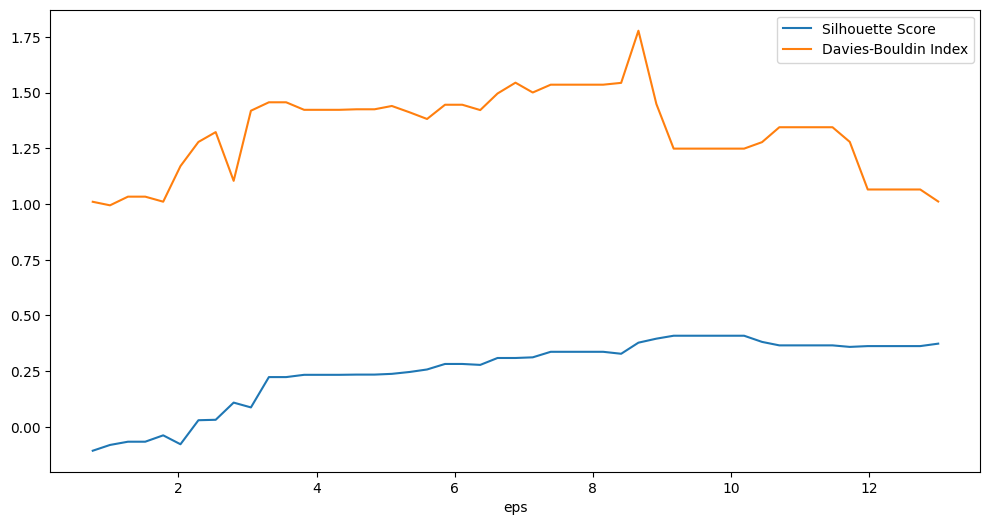

In [50]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

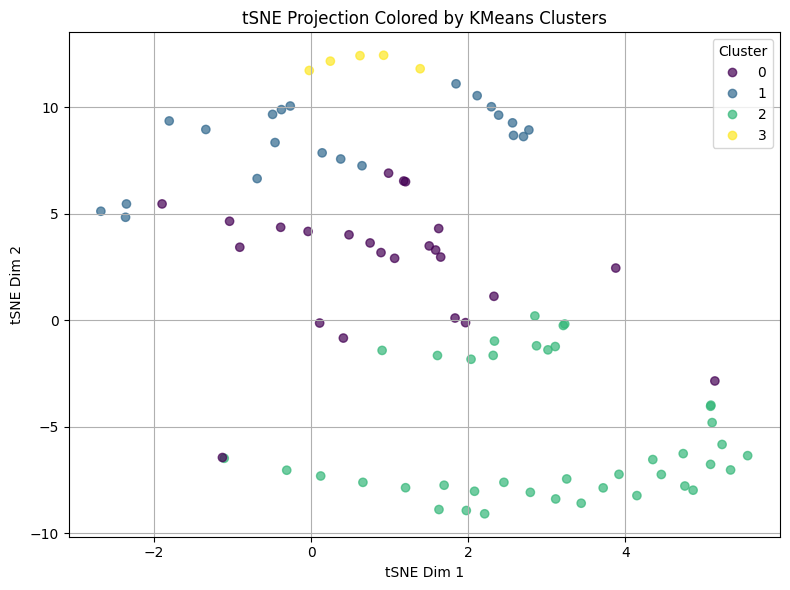

In [51]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.05            2         6    255          0.991143   
1    0.05            2         7    253          0.990720   
2    0.06            2         8    251          0.984529   
3    0.06            2         9    249          0.983281   
4    0.07            2         9    249          0.983281   
..    ...          ...       ...    ...               ...   
195  0.98            2        15     49          0.343234   
196  0.99            2        15     49          0.343234   
197  0.99            2        15     48          0.340884   
198  1.00            2        13     48          0.097319   
199  1.00            2        13     47          0.092235   

     Davies-Bouldin Index  
0                0.011186  
1                0.011167  
2                0.017218  
3                0.018834  
4                0.018834  
..                    ...  
195              0.608253  
196              0.608253  
197              0.636263  
198              0.680867  
199              0.682903  

[200 rows x 6 columns]

<Axes: xlabel='eps'>

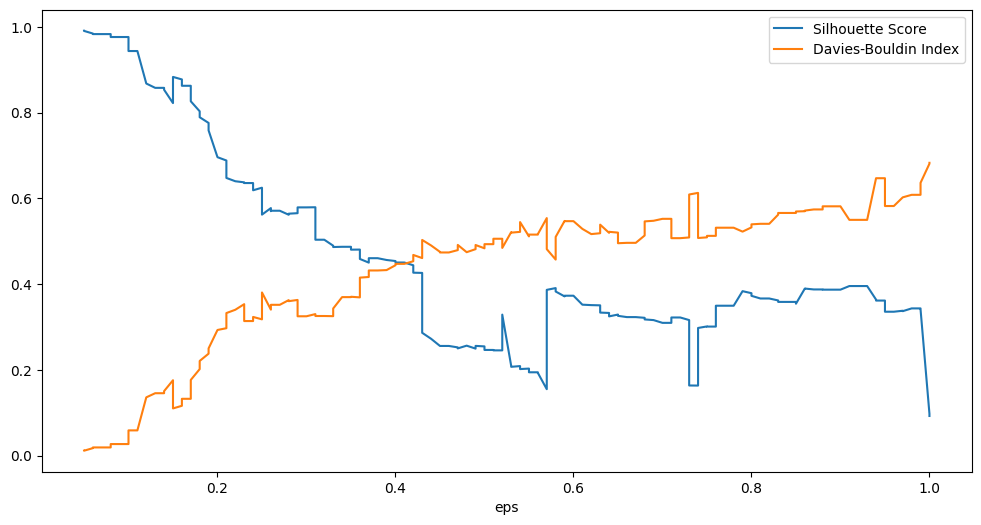

In [52]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 200)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

#### Winter (4)

In [53]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

In [54]:
season = 4
season_year = 2016
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids]
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 90 entries, 2016-12-01 to 2017-02-28
Columns: 248 entries, 10000009 to 9000015
dtypes: float64(248)
memory usage: 175.1 KB


None

            10000009  10000010  10000011  10000014  10000016  10000017  \
2016-12-01  1.173368  0.650919  0.540093  0.996068  0.520963  0.512851   
2016-12-02  1.123434  0.623448  0.514790  0.961712  0.500355  0.492563   
2016-12-03  1.018650  0.582829  0.495696  0.912977  0.486419  0.478844   
2016-12-04  0.986447  0.586510  0.488024  0.901163  0.486898  0.479316   
2016-12-05  0.997053  0.599449  0.485605  0.909434  0.487636  0.480043   
...              ...       ...       ...       ...       ...       ...   
2017-02-24  1.145270  0.669365  0.659849  0.959871  0.538695  0.530306   
2017-02-25  1.047170  0.653429  0.625491  0.927325  0.536968  0.528606   
2017-02-26  1.328247  0.794095  0.715246  1.077898  0.615019  0.605442   
2017-02-27  1.361779  0.775074  0.764840  1.068071  0.596560  0.587270   
2017-02-28  1.809648  1.002129  1.045999  1.253294  0.666337  0.655961   

            11000011  11000016  12000001  12000519  ...  66000014  66000034  \
2016-12-01  1.122299  1.115622  

          2016-12-01  2016-12-02  2016-12-03  2016-12-04  2016-12-05  \
10000009    0.303406    0.317231    0.325674    0.354330    0.392202   
10000010   -0.348828   -0.334436   -0.307596   -0.256610   -0.222899   
10000011   -0.487184   -0.476057   -0.434206   -0.407058   -0.399018   
10000014    0.082062    0.106448    0.172127    0.224051    0.256652   
10000016   -0.511066   -0.494872   -0.447686   -0.408777   -0.395877   
...              ...         ...         ...         ...         ...   
67000030   -0.314597   -0.246193   -0.275002   -0.276986   -0.279911   
7000003     0.078128    0.060856    0.033423    0.044200    0.091941   
8000001     0.307142    0.320030    0.344754    0.351446    0.382690   
9000001    -0.078864   -0.044565    0.057326    0.117922    0.120390   
9000015    -0.068380   -0.031486    0.073215    0.134846    0.138735   

          2016-12-06  2016-12-07  2016-12-08  2016-12-09  2016-12-10  ...  \
10000009    0.412550    0.398575    0.509407    0.483692  

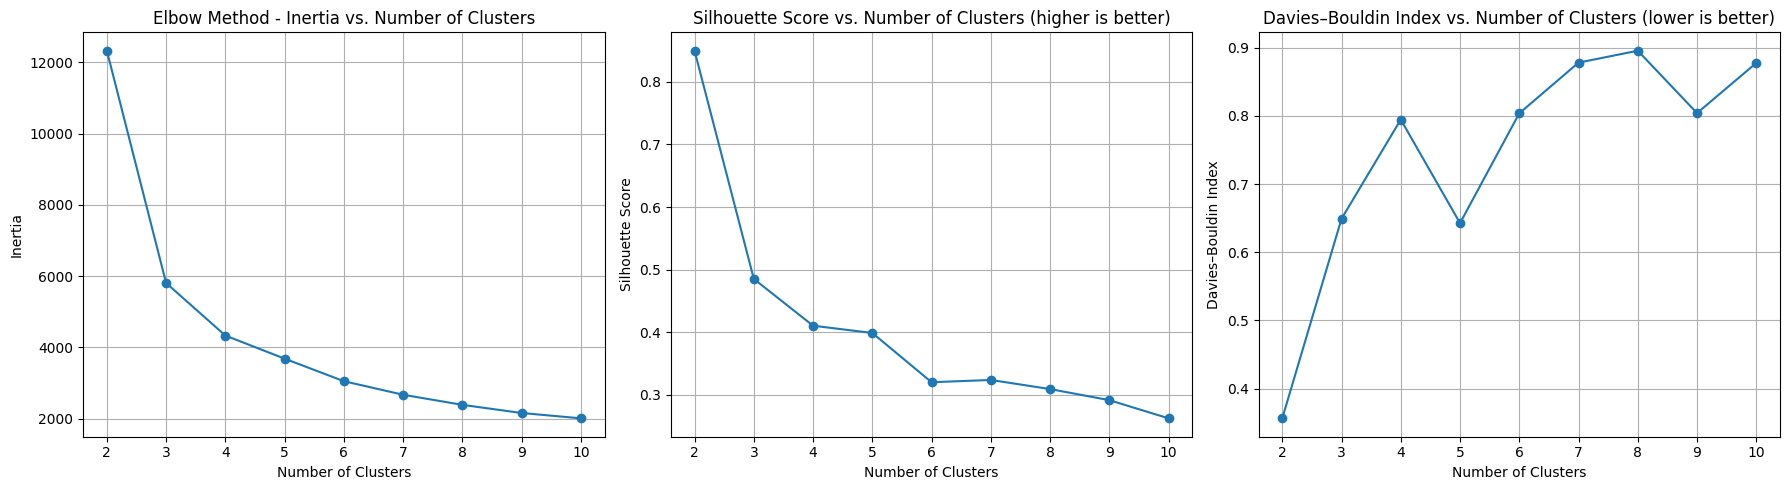

In [55]:
# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        2
10000010        1
10000011        1
10000014        2
10000016        1

            10000009  10000010  10000011  10000014  10000016  10000017  \
2016-12-01  1.173368  0.650919  0.540093  0.996068  0.520963  0.512851   
2016-12-02  1.123434  0.623448  0.514790  0.961712  0.500355  0.492563   
2016-12-03  1.018650  0.582829  0.495696  0.912977  0.486419  0.478844   
2016-12-04  0.986447  0.586510  0.488024  0.901163  0.486898  0.479316   
2016-12-05  0.997053  0.599449  0.485605  0.909434  0.487636  0.480043   
...              ...       ...       ...       ...       ...       ...   
2017-02-24  1.145270  0.669365  0.659849  0.959871  0.538695  0.530306   
2017-02-25  1.047170  0.653429  0.625491  0.927325  0.536968  0.528606   
2017-02-26  1.328247  0.794095  0.715246  1.077898  0.615019  0.605442   
2017-02-27  1.361779  0.775074  0.764840  1.068071  0.596560  0.587270   
2017-02-28  1.809648  1.002129  1.045999  1.253294  0.666337  0.655961   

            11000011  11000016  12000001  12000519  ...  66000014  66000034  \
2016-12-01  1.122299  1.115622  

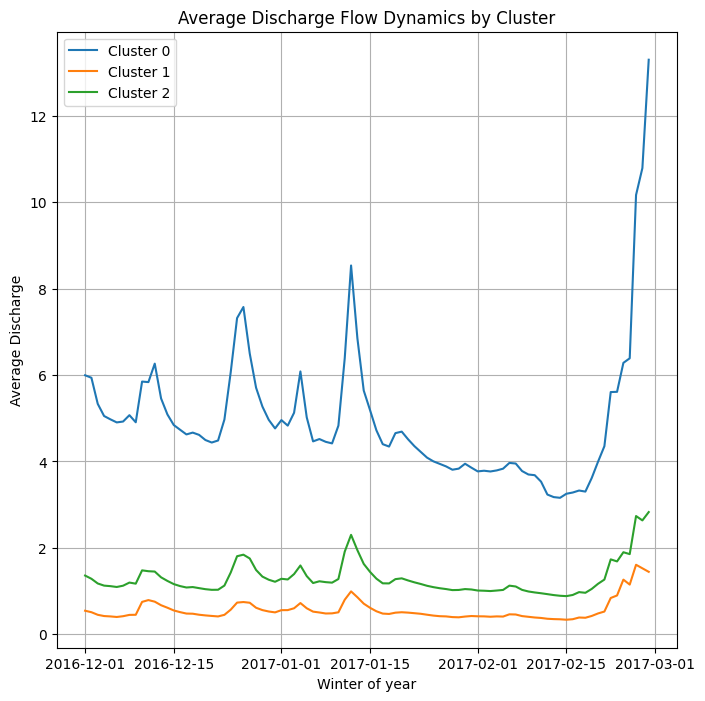

In [56]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure(figsize=(8, 8))
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Winter of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [57]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)

In [58]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000011  10000014  10000016  10000017  \
2016-12-01  1.173368  0.650919  0.540093  0.996068  0.520963  0.512851   
2016-12-02  1.123434  0.623448  0.514790  0.961712  0.500355  0.492563   
2016-12-03  1.018650  0.582829  0.495696  0.912977  0.486419  0.478844   
2016-12-04  0.986447  0.586510  0.488024  0.901163  0.486898  0.479316   
2016-12-05  0.997053  0.599449  0.485605  0.909434  0.487636  0.480043   
...              ...       ...       ...       ...       ...       ...   
2017-02-24  1.145270  0.669365  0.659849  0.959871  0.538695  0.530306   
2017-02-25  1.047170  0.653429  0.625491  0.927325  0.536968  0.528606   
2017-02-26  1.328247  0.794095  0.715246  1.077898  0.615019  0.605442   
2017-02-27  1.361779  0.775074  0.764840  1.068071  0.596560  0.587270   
2017-02-28  1.809648  1.002129  1.045999  1.253294  0.666337  0.655961   

            11000011  11000016  12000001  12000519  ...  66000014  66000034  \
2016-12-01  1.122299  1.115622  0.675017  1.219392  ...  0.517628  0.464739   
2016-12-02  1.112463  1.058971  0.616940  1.115041  ...  0.492979  0.513638   
2016-12-03  1.080021  0.961347  0.575671  1.086949  ...  0.420317  0.456699   
2016-12-04  1.044417  0.928703  0.555859  1.062576  ...  0.400952  0.422563   
2016-12-05  1.014794  0.909784  0.542968  1.019971  ...  0.403544  0.400659   
...              ...       ...       ...       ...  ...       ...       ...   
2017-02-24  0.924545  0.847552  0.635223  0.969015  ...  1.948467  3.198504   
2017-02-25  0.927832  0.896428  0.794266  1.173626  ...  1.258795  2.115881   
2017-02-26  1.011169  1.461329  1.111718  1.282785  ...  1.609951  2.667001   
2017-02-27  1.082846  1.291437  1.047319  1.349813  ...  1.317016  2.207232   
2017-02-28  1.189820  1.885678  1.506974  1.554463  ...  0.991792  1.697021   

            67000017  67000018  67000019  67000030   7000003   8000001  \
2016-12-01  0.472761  0.565170  0.837766  0.678338  0.992917  1.176361   
2016-12-02  0.626180  0.723424  0.878125  0.691152  0.926732  1.125581   
2016-12-03  0.512754  0.600883  0.788252  0.605261  0.817521  1.031780   
2016-12-04  0.433308  0.533152  0.740012  0.573172  0.783428  0.984559   
2016-12-05  0.407105  0.502009  0.731913  0.562597  0.802963  0.990904   
...              ...       ...       ...       ...       ...       ...   
2017-02-24  5.070252  6.210812  6.083697  4.286205  1.111019  1.212020   
2017-02-25  3.216006  3.643513  4.615775  2.195158  0.955662  1.072521   
2017-02-26  4.163040  6.311824  7.836334  4.430276  1.247005  1.299720   
2017-02-27  4.823508  4.577237  8.076099  3.290109  1.339511  1.380604   
2017-02-28  3.293476  3.322689  6.446694  2.243379  1.978838  1.889089   

             9000001   9000015  
2016-12-01  0.867164  0.875562  
2016-12-02  0.845849  0.855883  
2016-12-03  0.833971  0.844906  
2016-12-04  0.831689  0.842767  
2016-12-05  0.821353  0.833211  
...              ...       ...  
2017-02-24  1.277062  1.250832  
2017-02-25  1.285505  1.258657  
2017-02-26  1.495784  1.452847  
2017-02-27  1.639562  1.585694  
2017-02-28  1.919637  1.844582  

[90 rows x 248 columns]

<Axes: >

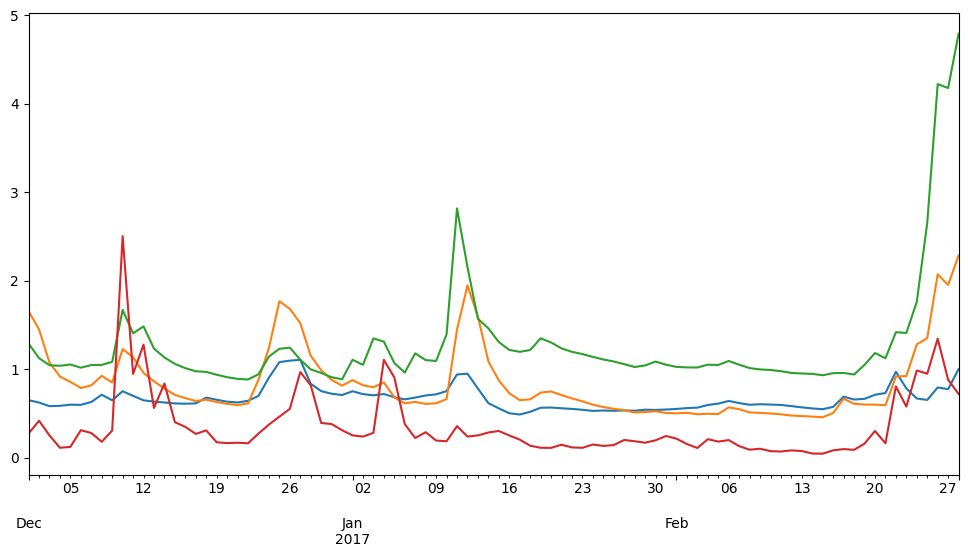

In [59]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

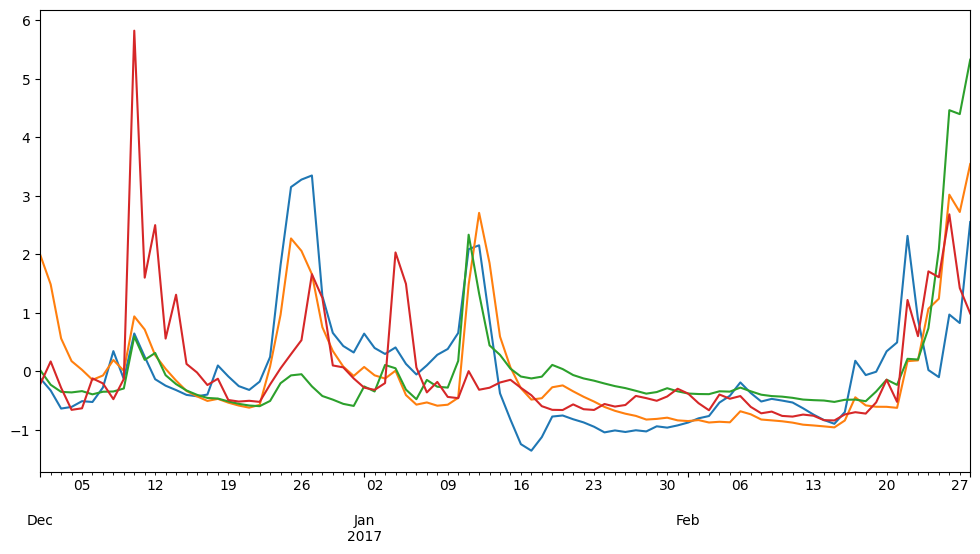

In [60]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

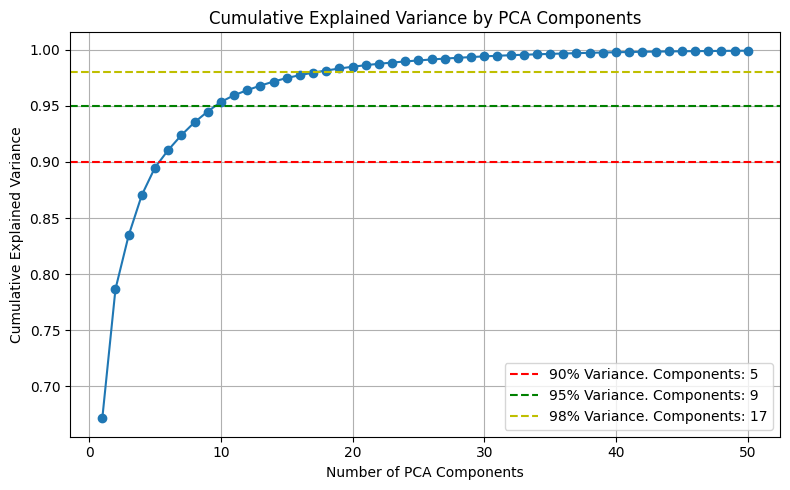

In [61]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [62]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[  1.00288482,   5.54962504,   2.90874002, ...,  -0.71905815,
          1.0792768 ,  -0.700781  ],
       [ -1.25903251,   3.92164535,   4.5339767 , ...,  -0.12405272,
          0.67980848,  -0.22327828],
       [ -4.82580543,   2.45179544,   4.74976005, ...,   0.06122442,
          0.09805233,   0.25438631],
       ...,
       [ 49.39921537, -14.37810894,  -2.71633724, ...,   0.34664413,
          0.76191803,   0.54695572],
       [ 48.04892298, -11.41800676,   0.93632133, ...,   0.84602852,
         -0.35674123,  -1.01319892],
       [ 50.98351038,   0.26611991,   0.60026221, ...,  -0.1828247 ,
         -0.6993329 ,   0.57377265]], shape=(90, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_37576\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


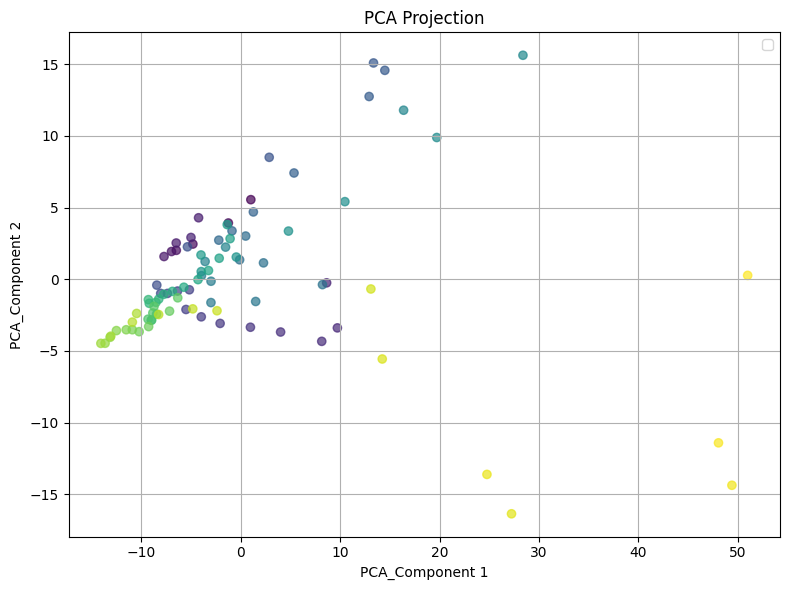

In [63]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_37576\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


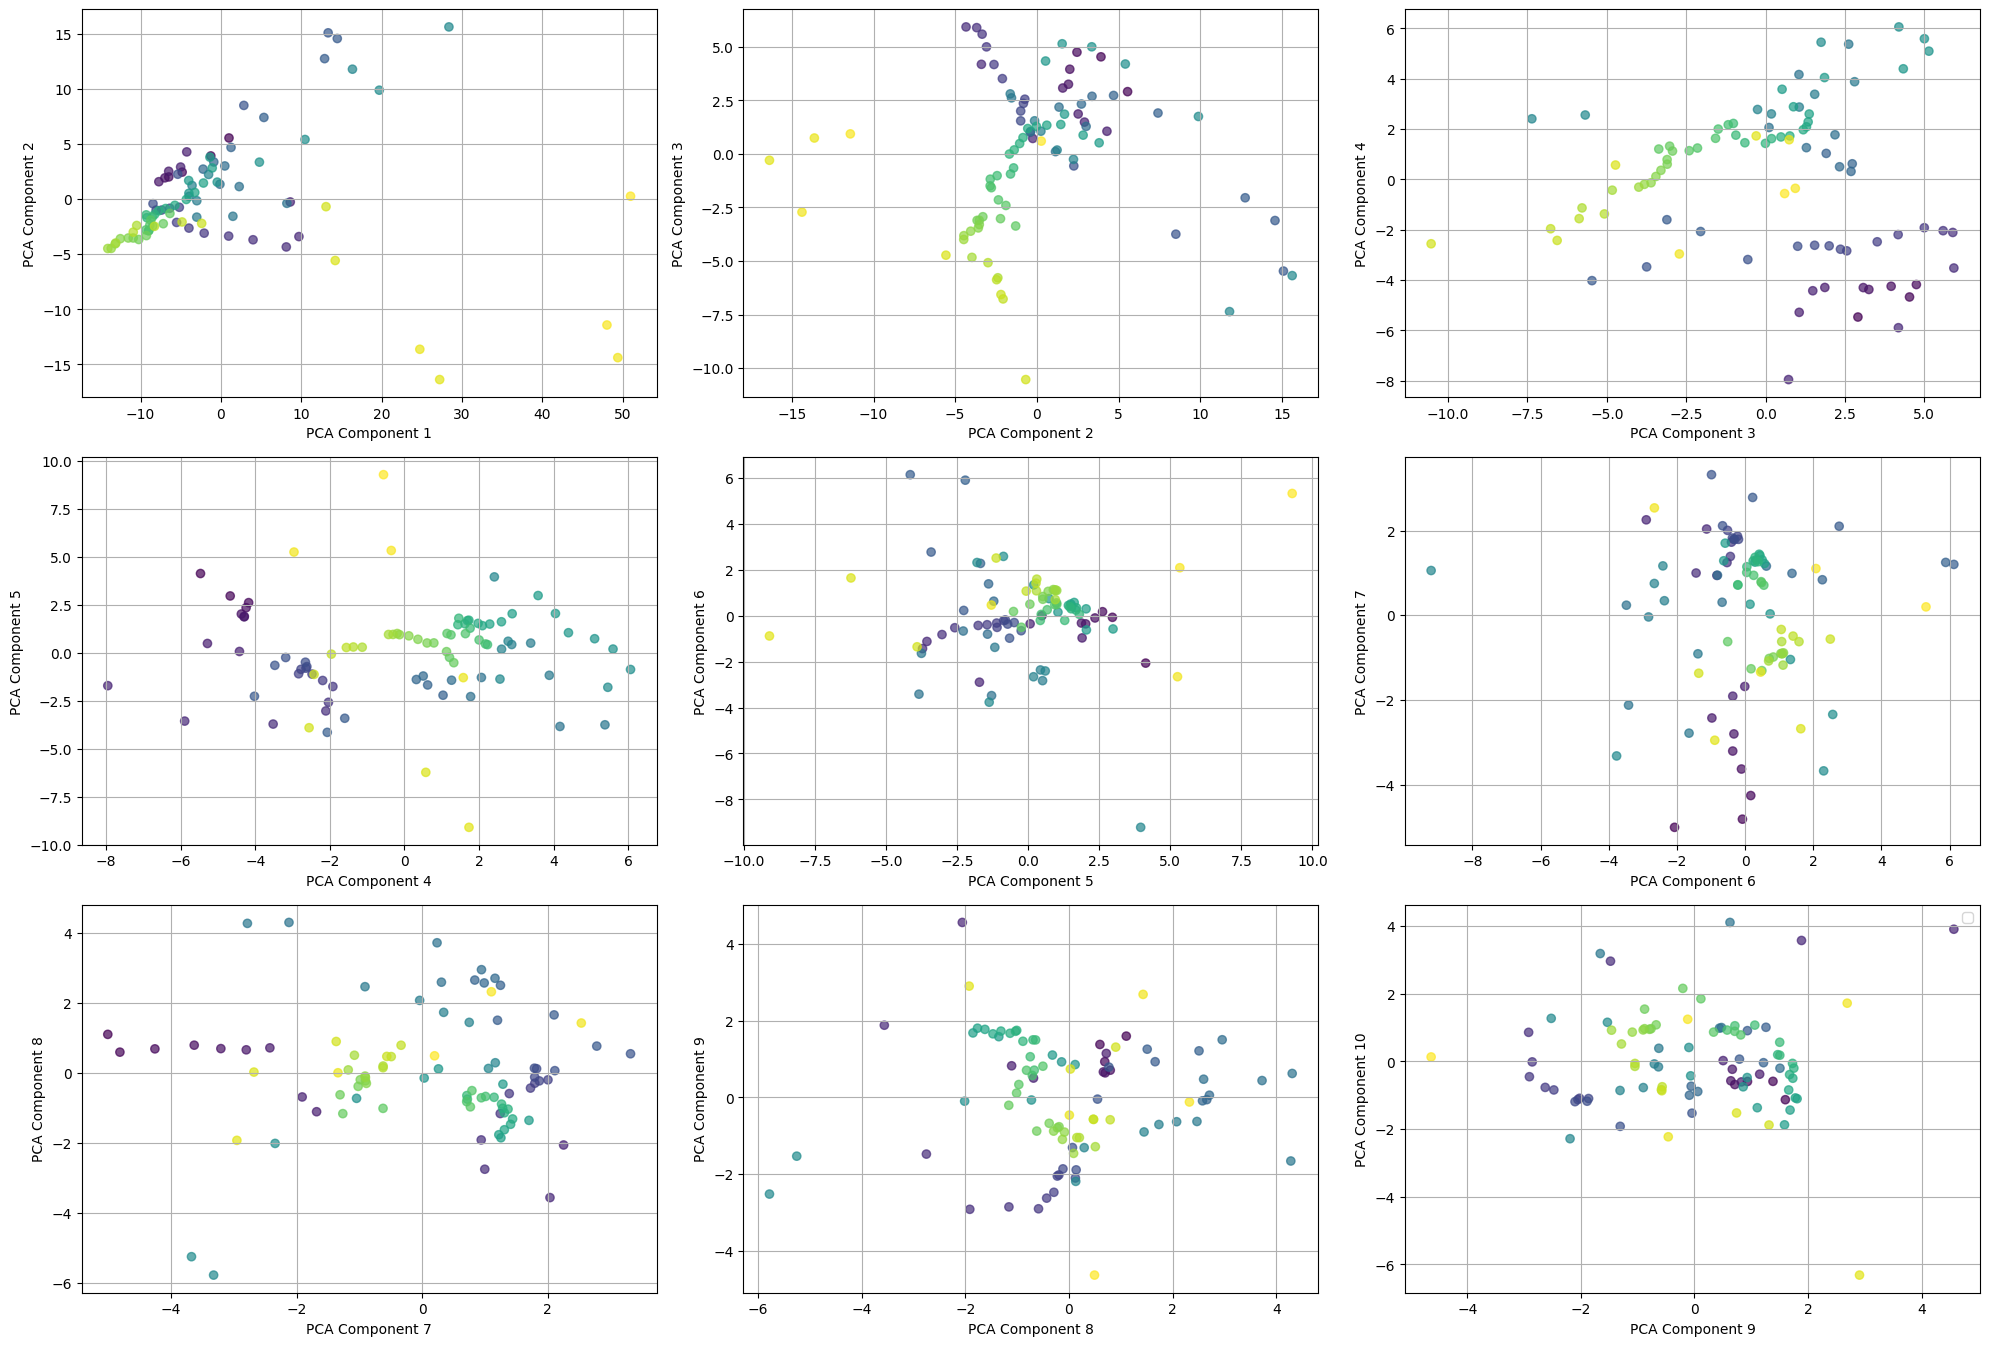

In [64]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [65]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.268
KMeans Davies-Bouldin Index is 1.141


<Axes: xlabel='k'>

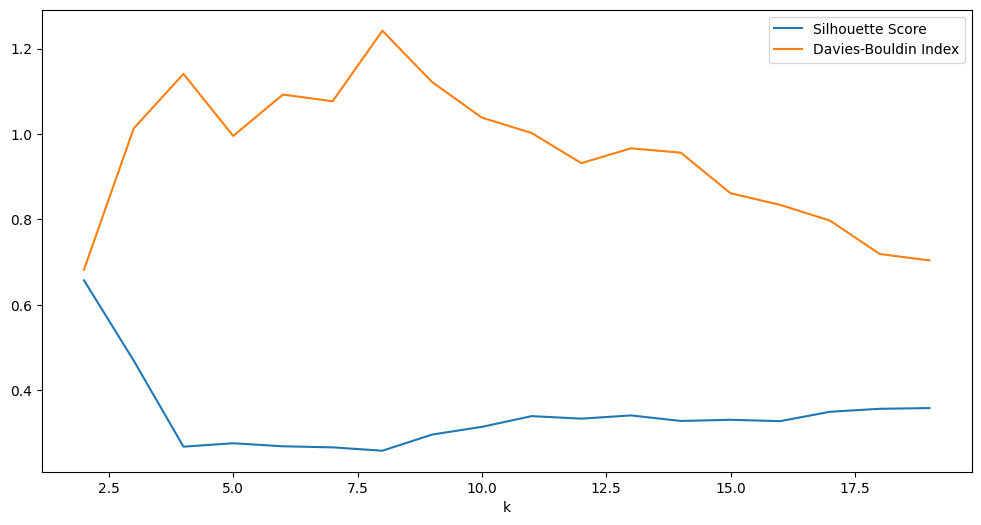

In [66]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     90               NaN   
1    0.76            3         0     90               NaN   
2    1.01            3         1     87               NaN   
3    1.27            3         5     66         -0.088881   
4    1.52            3         5     62         -0.054398   
5    1.78            3         4     58         -0.010307   
6    2.03            3         4     55          0.029104   
7    2.29            3         5     50          0.031406   
8    2.54            3         5     48          0.051946   
9    2.80            3         6     44          0.067847   
10   3.05            3         7     40          0.083626   
11   3.31            3         6     36          0.130344   
12   3.56            3         6     34          0.131643   
13   3.82            3         5     34          0.114852   
14   4.07            3         6     30          0.142793   
15   4.33            3         5     27          0.143905   
16   4.58            3         5     24          0.168298   
17   4.84            3         5     23          0.175267   
18   5.09            3         5     22          0.180244   
19   5.35            3         5     22          0.180244   
20   5.60            3         5     21          0.179257   
21   5.86            3         5     21          0.179257   
22   6.11            3         4     21          0.131651   
23   6.37            3         3     19          0.134339   
24   6.62            3         2     19          0.079991   
25   6.88            3         1     19               NaN   
26   7.13            3         1     18               NaN   
27   7.39            3         1     18               NaN   
28   7.64            3         1     16               NaN   
29   7.90            3         2     13          0.453132   
30   8.15            3         2     13          0.453132   
31   8.41            3         2     13          0.453132   
32   8.66            3         2     13          0.453132   
33   8.92            3         2     13          0.453132   
34   9.17            3         2     11          0.464192   
35   9.43            3         2     11          0.464192   
36   9.68            3         2     11          0.464192   
37   9.94            3         2     11          0.464192   
38  10.19            3         2     11          0.464192   
39  10.45            3         2     11          0.464192   
40  10.70            3         2     11          0.464192   
41  10.96            3         2     11          0.464192   
42  11.21            3         2     10          0.468744   
43  11.47            3         2     10          0.468744   
44  11.72            3         2      9          0.460889   
45  11.98            3         2      9          0.460889   
46  12.23            3         2      9          0.460889   
47  12.49            3         1      9               NaN   
48  12.74            3         1      9               NaN   
49  13.00            3         1      9               NaN   

    Davies-Bouldin Index  
0                    NaN  
1                    NaN  
2                    NaN  
3               1.149264  
4               1.154309  
5               1.211993  
6               1.187018  
7               1.273318  
8               1.267655  
9               1.143824  
10              1.250318  
11              1.234968  
12              1.249852  
13              1.292713  
14              1.188696  
15              1.151848  
16              1.139053  
17              1.130555  
18              1.138458  
19              1.138458  
20              1.160013  
21              1.160013  
22              1.281543  
23              1.435638  
24              1.224710  
25                   NaN  
26                   NaN  
27                   NaN  
28                   NaN  
29              1.203472  
30              1.203472  
31              1.203472  
32 

<Axes: xlabel='eps'>

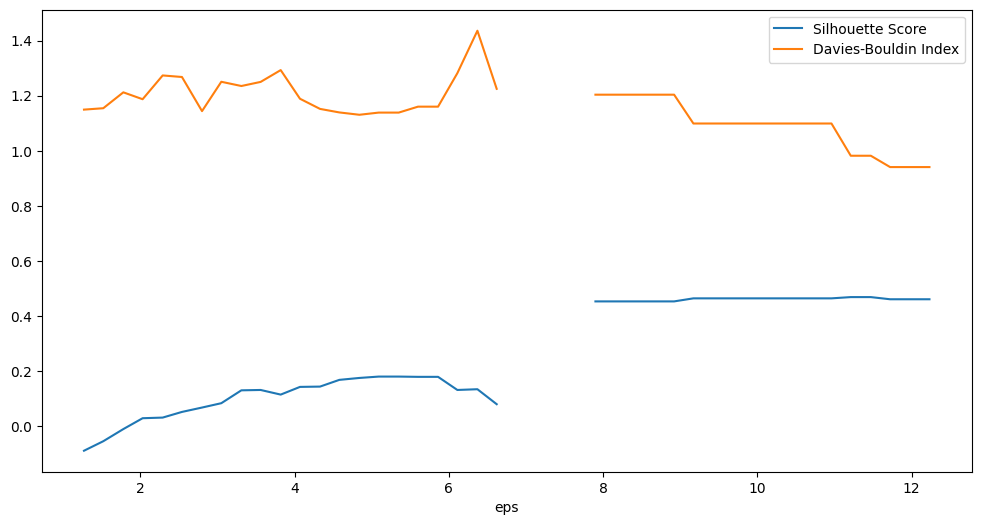

In [67]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

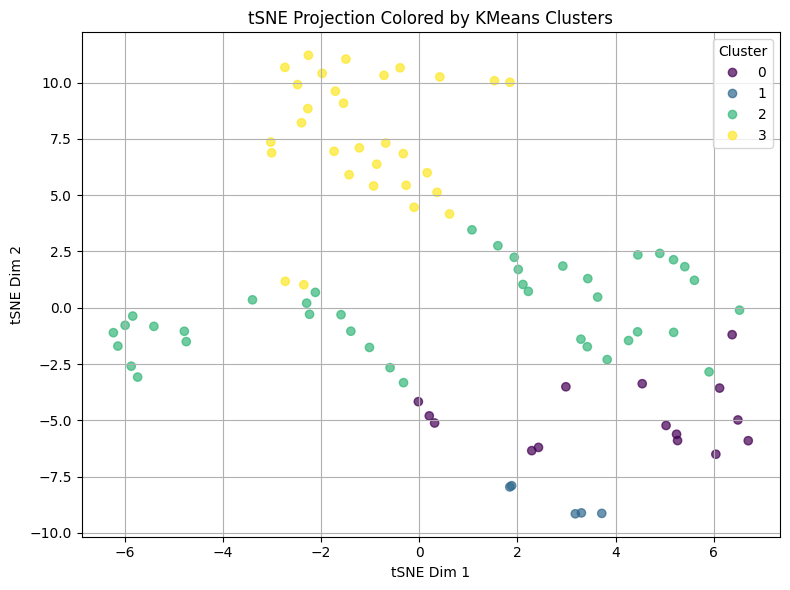

In [68]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.05            2         2    244          0.992856   
1    0.05            2         2    244          0.992856   
2    0.06            2         2    244          0.992856   
3    0.06            2         2    244          0.992856   
4    0.07            2         2    244          0.992856   
..    ...          ...       ...    ...               ...   
195  0.98            2        23     96          0.197595   
196  0.99            2        23     96          0.197595   
197  0.99            2        23     95          0.197771   
198  1.00            2        23     95          0.197771   
199  1.00            2        23     95          0.197771   

     Davies-Bouldin Index  
0                0.007144  
1                0.007144  
2                0.007144  
3                0.007144  
4                0.007144  
..                    ...  
195              0.594419  
196              0.594419  
197              0.595424  
198              0.595424  
199              0.595424  

[200 rows x 6 columns]

<Axes: xlabel='eps'>

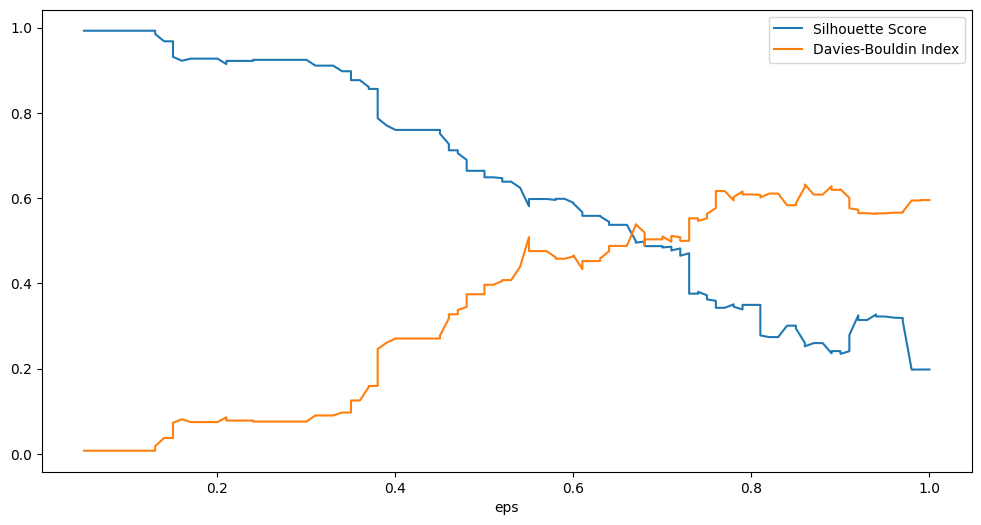

In [69]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 200)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))